In [1]:
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.3 ──
✔ tibble      3.1.2      ✔ tsibble     0.9.3 
✔ dplyr       1.0.7      ✔ tsibbledata 0.2.0 
✔ tidyr       1.1.3      ✔ feasts      0.1.6 
✔ lubridate   1.7.10     ✔ fable       0.2.1 
✔ ggplot2     3.3.3      
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()   masks base::date()
✖ dplyr::filter()     masks stats::filter()
✖ tsibble::interval() masks lubridate::interval()
✖ dplyr::lag()        masks stats::lag()


# 1.

## Australia Population

In [2]:
print(global_economy)

# A tsibble: 15,150 x 9 [1Y]
# Key:       Country [263]
   Country     Code   Year         GDP Growth   CPI Imports Exports Population
   <fct>       <fct> <dbl>       <dbl>  <dbl> <dbl>   <dbl>   <dbl>      <dbl>
 1 Afghanistan AFG    1960  537777811.     NA    NA    7.02    4.13    8996351
 2 Afghanistan AFG    1961  548888896.     NA    NA    8.10    4.45    9166764
 3 Afghanistan AFG    1962  546666678.     NA    NA    9.35    4.88    9345868
 4 Afghanistan AFG    1963  751111191.     NA    NA   16.9     9.17    9533954
 5 Afghanistan AFG    1964  800000044.     NA    NA   18.1     8.89    9731361
 6 Afghanistan AFG    1965 1006666638.     NA    NA   21.4    11.3     9938414
 7 Afghanistan AFG    1966 1399999967.     NA    NA   18.6     8.57   10152331
 8 Afghanistan AFG    1967 1673333418.     NA    NA   14.2     6.77   10372630
 9 Afghanistan AFG    1968 1373333367.     NA    NA   15.2     8.90   10604346
10 Afghanistan AFG    1969 1408888922.     NA    NA   15.0    10.1    10854

In [3]:
#get just australian data
australia <- global_economy %>%
    filter(Country == "Australia")

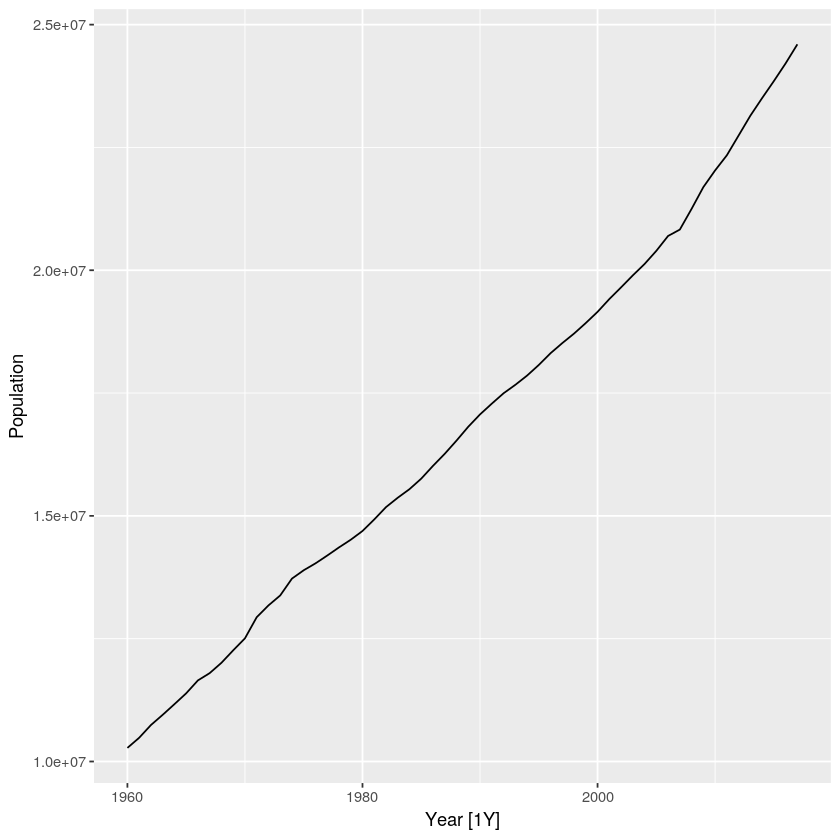

In [4]:
australia %>%
    autoplot(Population)

### Forecast

Because this data is all upward trend and no season, a `DRIFT` method would be most appropriate.

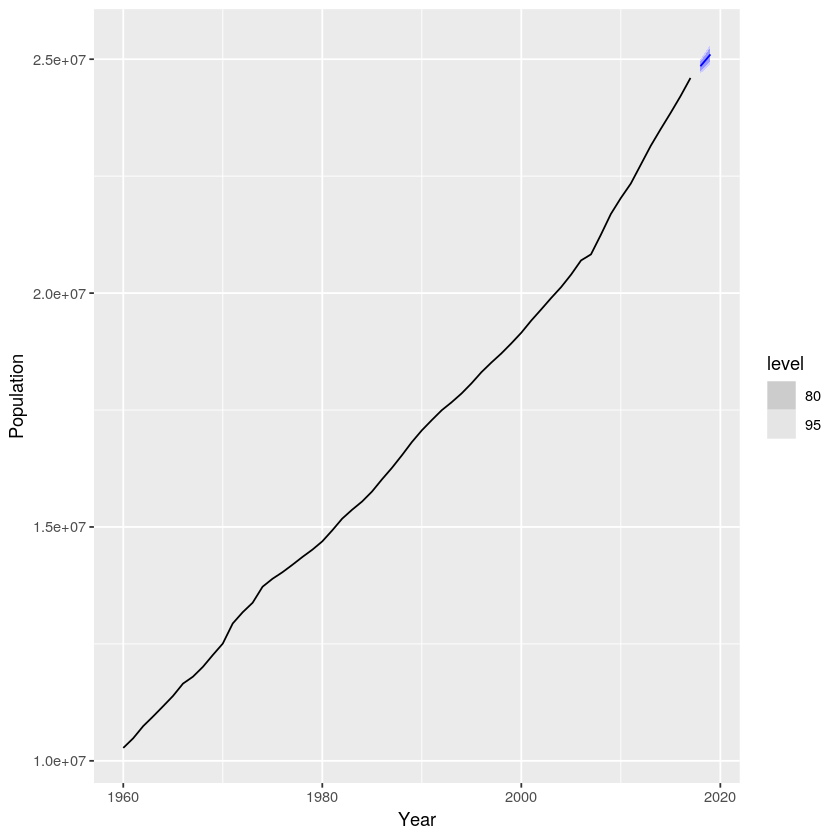

In [5]:
#fit the drift model
fit_drift <- australia %>%
    model(RW(Population ~ drift()))

#produce the forecast
fit_drift %>%
    forecast() %>%
    autoplot(australia)

## Bricks

In [6]:
print(aus_production)

# A tsibble: 218 x 7 [1Q]
   Quarter  Beer Tobacco Bricks Cement Electricity   Gas
     <qtr> <dbl>   <dbl>  <dbl>  <dbl>       <dbl> <dbl>
 1 1956 Q1   284    5225    189    465        3923     5
 2 1956 Q2   213    5178    204    532        4436     6
 3 1956 Q3   227    5297    208    561        4806     7
 4 1956 Q4   308    5681    197    570        4418     6
 5 1957 Q1   262    5577    187    529        4339     5
 6 1957 Q2   228    5651    214    604        4811     7
 7 1957 Q3   236    5317    227    603        5259     7
 8 1957 Q4   320    6152    222    582        4735     6
 9 1958 Q1   272    5758    199    554        4608     5
10 1958 Q2   233    5641    229    620        5196     7
# … with 208 more rows


In [7]:
#subset the index since it is just na's past 
#2005 Q2
bricks <- aus_production %>%
    filter_index("1956 Q1" ~ "2005 Q2")

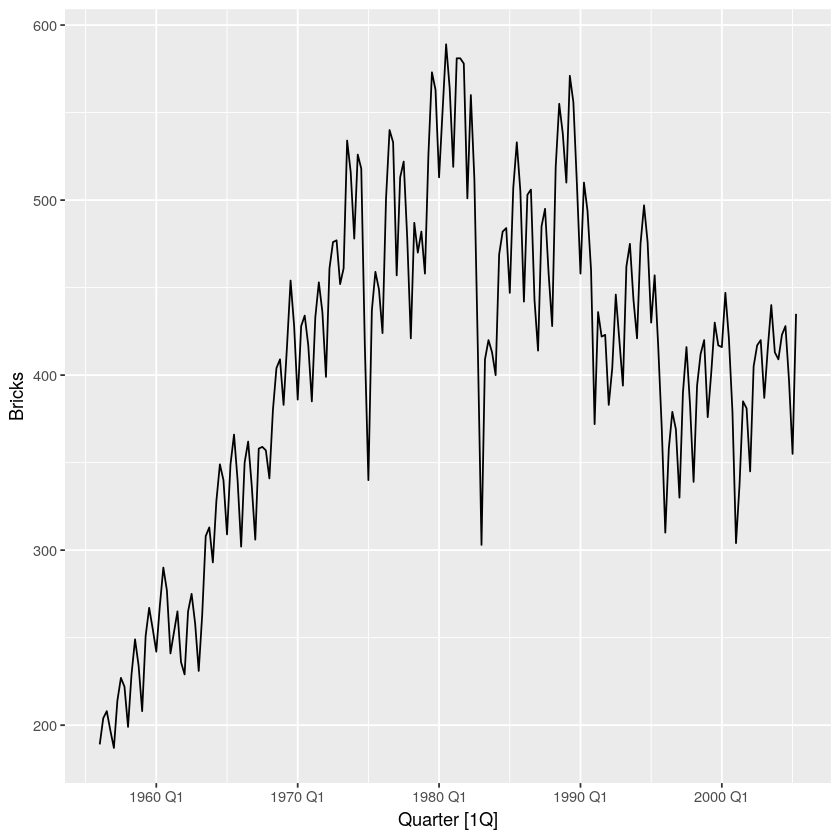

In [8]:
bricks %>%
    autoplot(Bricks)

### Forecast

Because there is clearly a seasonal component in this dataset, I believe that SNAIVE is the most appropriate forecasting method of the three.

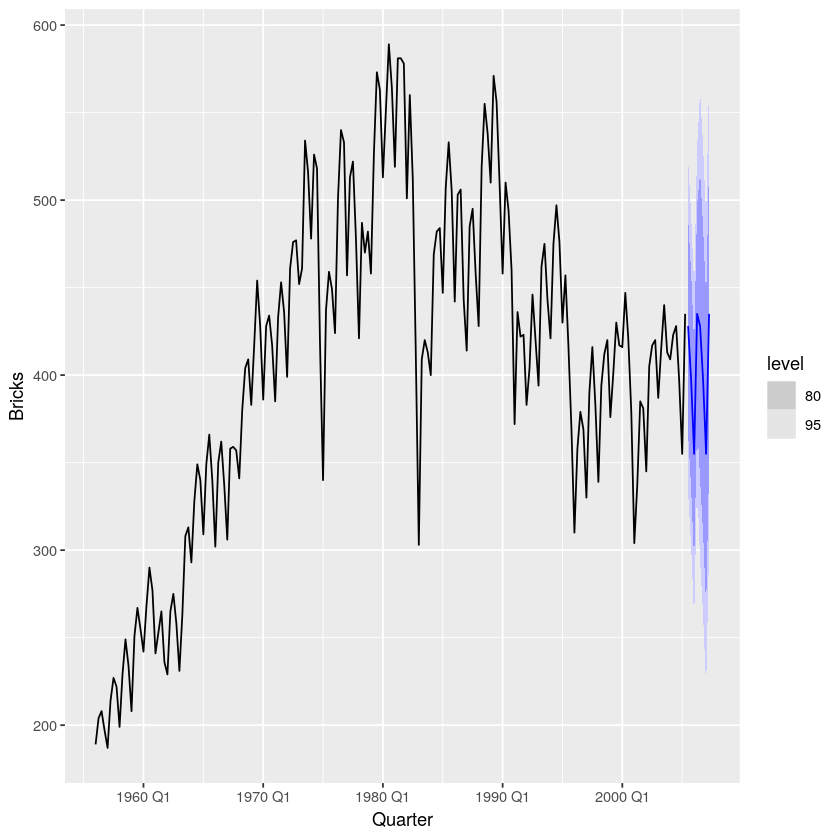

In [9]:
fit_snaive <- bricks %>%
    model(SNAIVE(Bricks ~ lag("year")))

fit_snaive %>%
    forecast() %>%
    autoplot(bricks)

## NSW Lambs

In [10]:
#lambs in new south wales
nsw_lambs <- aus_livestock %>%
    filter(Animal == "Lambs", State == "New South Wales")

In [11]:
print(nsw_lambs)

# A tsibble: 558 x 4 [1M]
# Key:       Animal, State [1]
      Month Animal State            Count
      <mth> <fct>  <fct>            <dbl>
 1 1972 Jul Lambs  New South Wales 587600
 2 1972 Aug Lambs  New South Wales 553700
 3 1972 Sep Lambs  New South Wales 494900
 4 1972 Oct Lambs  New South Wales 533500
 5 1972 Nov Lambs  New South Wales 574300
 6 1972 Dec Lambs  New South Wales 517500
 7 1973 Jan Lambs  New South Wales 562600
 8 1973 Feb Lambs  New South Wales 426900
 9 1973 Mar Lambs  New South Wales 496300
10 1973 Apr Lambs  New South Wales 496000
# … with 548 more rows


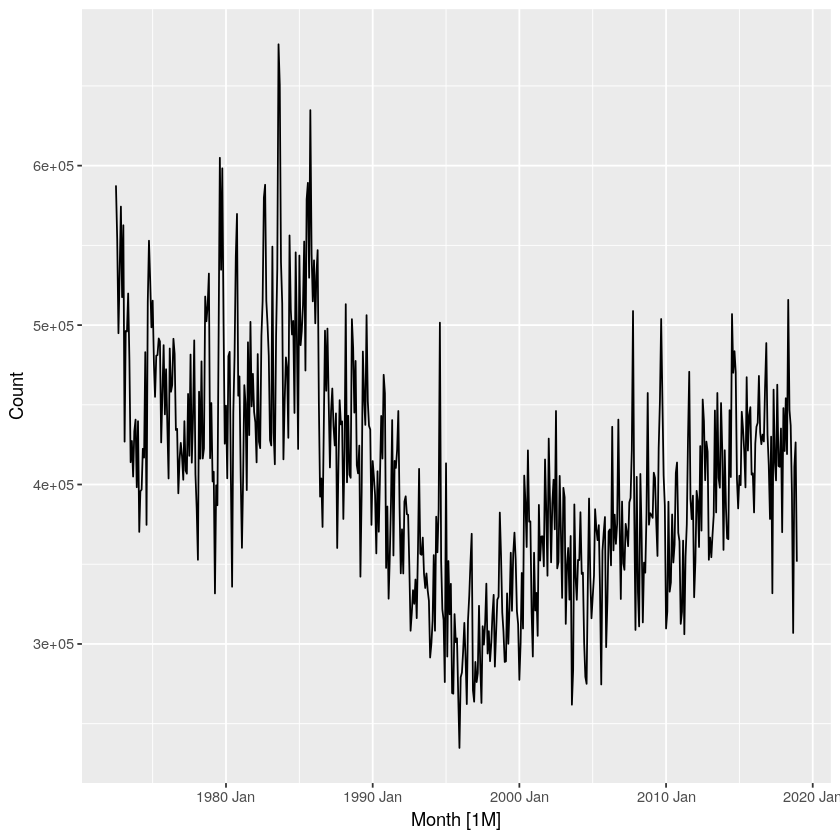

In [12]:
nsw_lambs %>%
    autoplot(Count)

### Forecast

Because the data is seasonal, it is most appropriate to use a SNAIVE forecast.

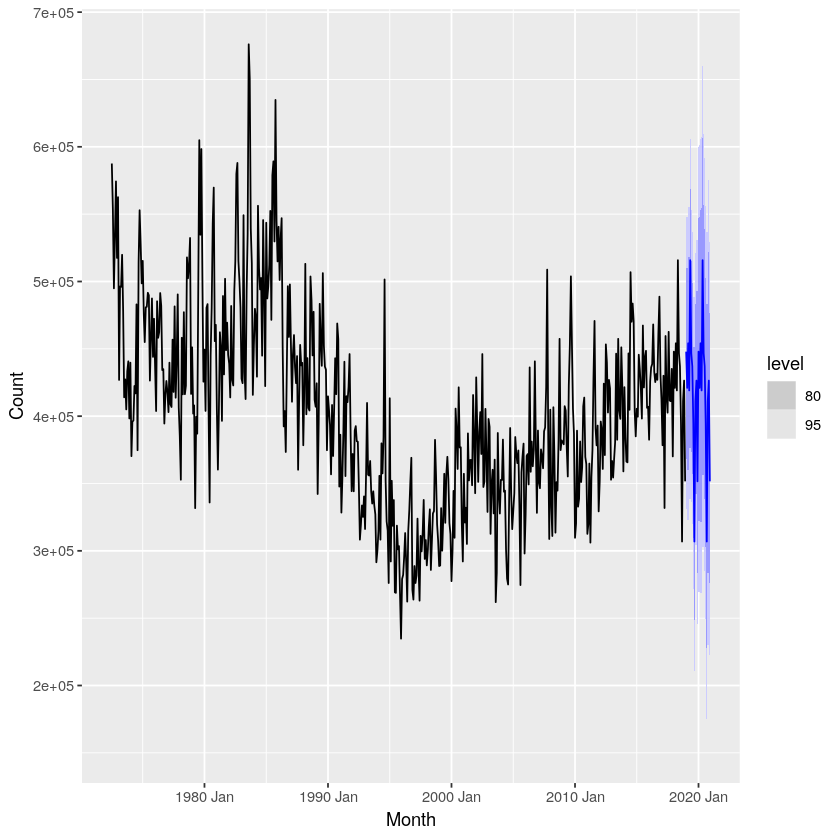

In [13]:
fit_snaive <- nsw_lambs %>%
    model(SNAIVE(Count ~ lag("year")))

fit_snaive %>%
    forecast() %>%
    autoplot(nsw_lambs)

## Household wealth

In [14]:
print(hh_budget)

# A tsibble: 88 x 8 [1Y]
# Key:       Country [4]
   Country    Year  Debt     DI Expenditure Savings Wealth Unemployment
   <chr>     <dbl> <dbl>  <dbl>       <dbl>   <dbl>  <dbl>        <dbl>
 1 Australia  1995  95.7 3.72          3.40   5.24    315.         8.47
 2 Australia  1996  99.5 3.98          2.97   6.47    315.         8.51
 3 Australia  1997 108.  2.52          4.95   3.74    323.         8.36
 4 Australia  1998 115.  4.02          5.73   1.29    339.         7.68
 5 Australia  1999 121.  3.84          4.26   0.638   354.         6.87
 6 Australia  2000 126.  3.77          3.18   1.99    350.         6.29
 7 Australia  2001 132.  4.36          3.10   3.24    348.         6.74
 8 Australia  2002 149.  0.0218        4.03  -1.15    349.         6.37
 9 Australia  2003 159.  6.06          5.04  -0.413   360.         5.93
10 Australia  2004 170.  5.53          4.54   0.657   379.         5.40
# … with 78 more rows


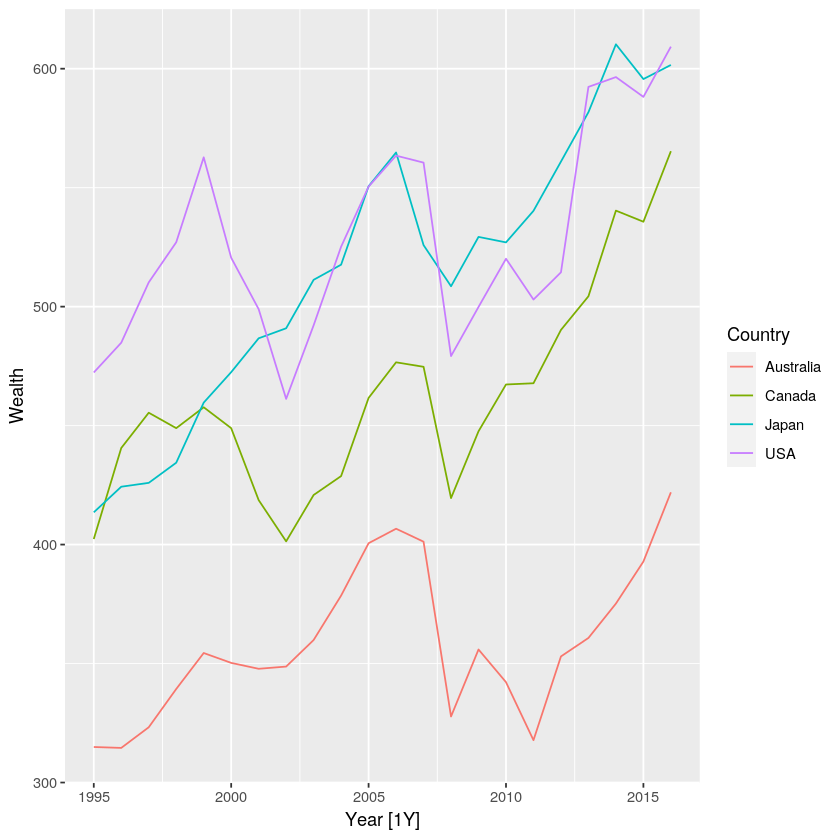

In [15]:
hh_budget %>%
    autoplot(Wealth)

### Forecast

Because this data has a clear upward trend, but is not seasonal, a `DRIFT` method would be most appropriate.

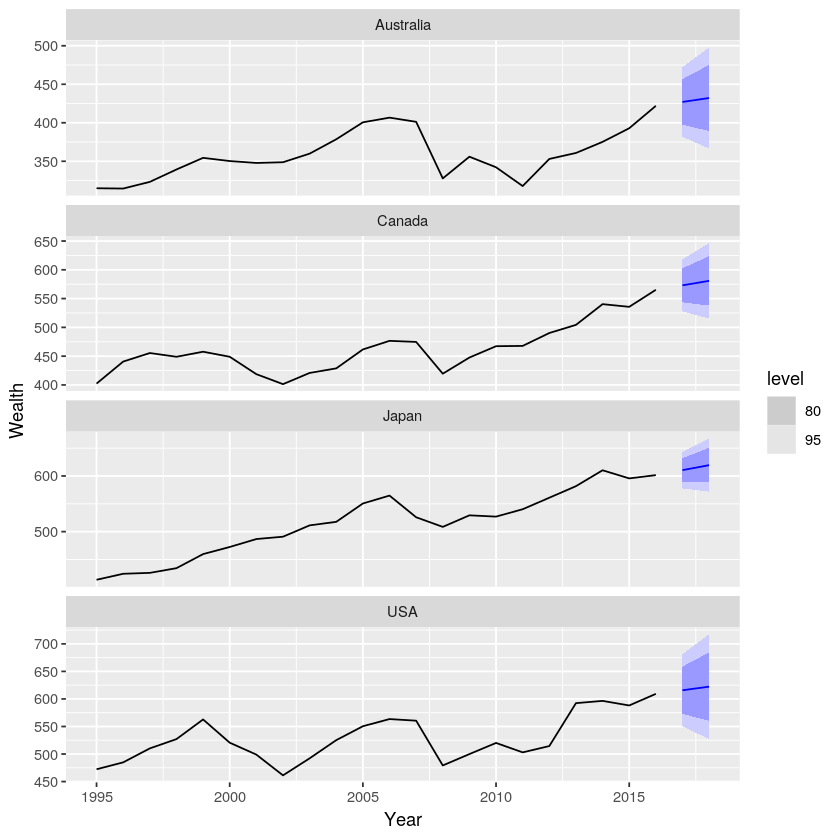

In [16]:
fit_drift <- hh_budget %>%
    model(RW(Wealth ~ drift()))

fit_drift %>%
    forecast() %>%
    autoplot(hh_budget)

## Australian takeaway food turnover

In [17]:
takeaway <- aus_retail %>%
    filter(Industry == 'Takeaway food services')

In [18]:
print(takeaway)

# A tsibble: 3,456 x 5 [1M]
# Key:       State, Industry [8]
   State                      Industry             `Series ID`    Month Turnover
   <chr>                      <chr>                <chr>          <mth>    <dbl>
 1 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Apr      3.2
 2 Australian Capital Territ… Takeaway food servi… A3349850K   1982 May      3.3
 3 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Jun      3.5
 4 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Jul      3.5
 5 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Aug      3.7
 6 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Sep      3.9
 7 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Oct      4  
 8 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Nov      4.3
 9 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Dec      4.3
10 Australian Capital Territ… Takeaway food serv

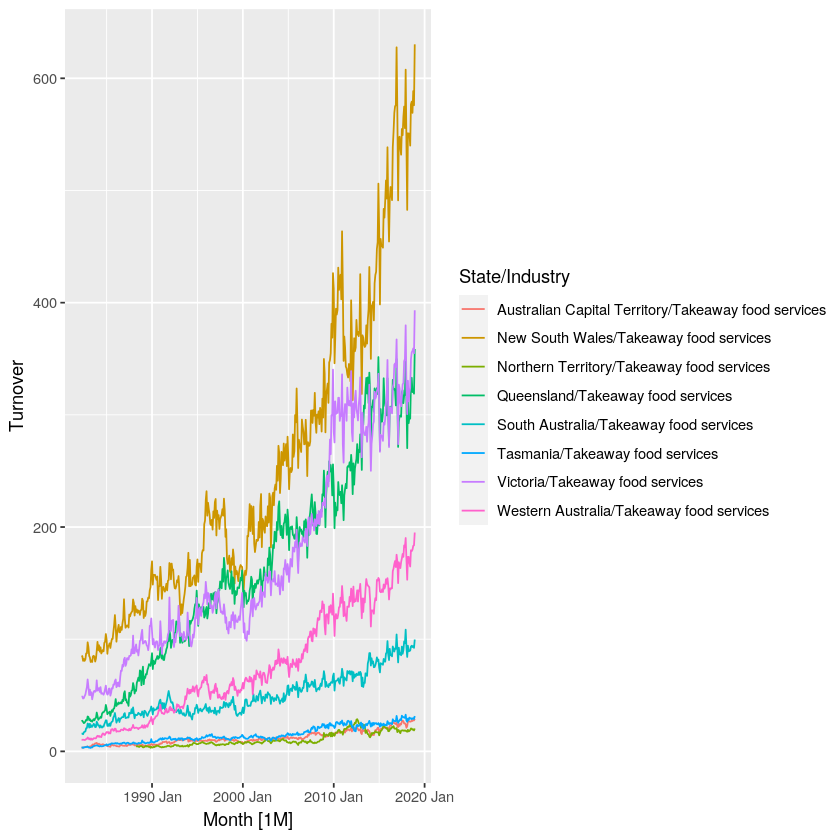

In [19]:
takeaway %>%
    autoplot(Turnover)

Warning message in NextMethod("["):
“Incompatible methods (">=.Date", ">=.vctrs_vctr") for ">="”Warning message in NextMethod("["):
“Incompatible methods ("<=.Date", "<=.vctrs_vctr") for "<="”Warning message in NextMethod("["):
“Incompatible methods (">=.Date", ">=.vctrs_vctr") for ">="”Warning message in NextMethod("["):
“Incompatible methods ("<=.Date", "<=.vctrs_vctr") for "<="”Warning message in NextMethod("["):
“Incompatible methods (">=.Date", ">=.vctrs_vctr") for ">="”Warning message in NextMethod("["):
“Incompatible methods ("<=.Date", "<=.vctrs_vctr") for "<="”Warning message in NextMethod("["):
“Incompatible methods (">=.Date", ">=.vctrs_vctr") for ">="”Warning message in NextMethod("["):
“Incompatible methods ("<=.Date", "<=.vctrs_vctr") for "<="”Warning message in NextMethod("["):
“Incompatible methods (">=.Date", ">=.vctrs_vctr") for ">="”Warning message in NextMethod("["):
“Incompatible methods ("<=.Date", "<=.vctrs_vctr") for "<="”Warning message in NextMethod("["):
“Inc

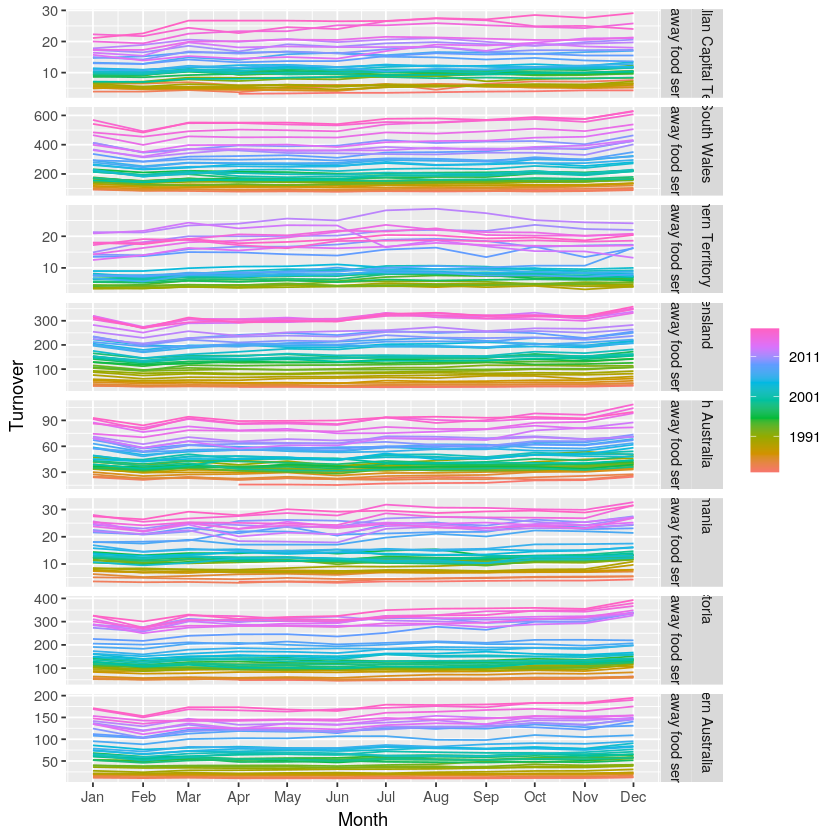

In [20]:
takeaway %>%
    gg_season(Turnover)

Because there appears to be a bit of seasonality in the data, I will choose to forecast with `SNAIVE`.

### Forecast

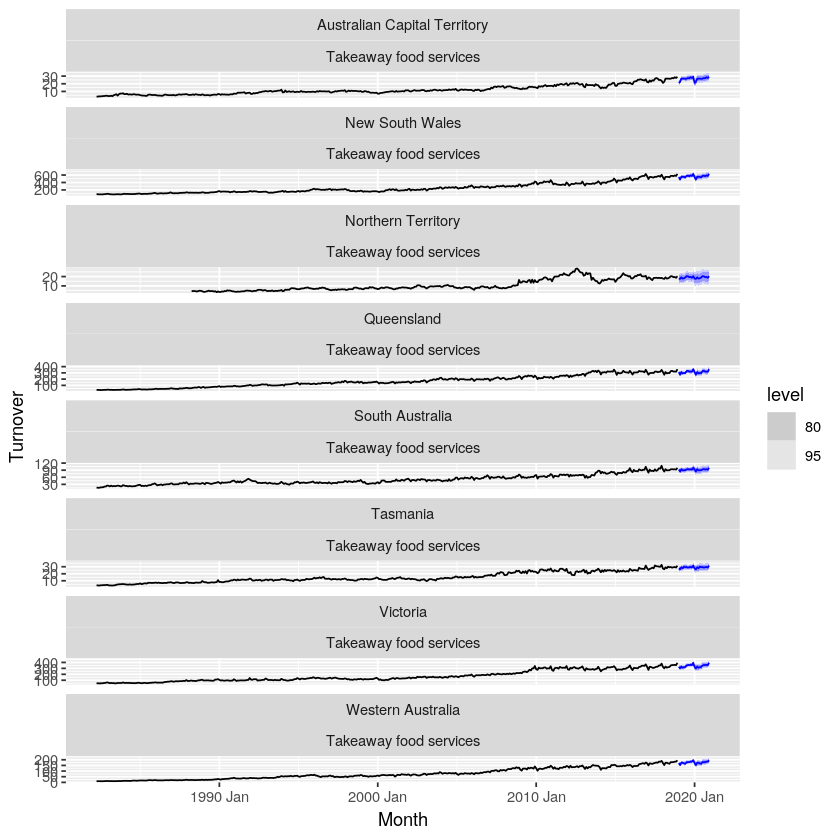

In [21]:
fit_snaive <- takeaway %>%
    model(SNAIVE(Turnover))

fit_snaive %>%
    forecast() %>%
    autoplot(takeaway)

# 2.

In [22]:
#get facebook data
fb_stock <- gafa_stock %>%
    filter(Symbol == 'FB') %>%
    mutate(day = row_number()) %>%
    update_tsibble(index = day, regular = TRUE)

In [23]:
print(fb_stock)

# A tsibble: 1,258 x 9 [1]
# Key:       Symbol [1]
   Symbol Date        Open  High   Low Close Adj_Close   Volume   day
   <chr>  <date>     <dbl> <dbl> <dbl> <dbl>     <dbl>    <dbl> <int>
 1 FB     2014-01-02  54.8  55.2  54.2  54.7      54.7 43195500     1
 2 FB     2014-01-03  55.0  55.7  54.5  54.6      54.6 38246200     2
 3 FB     2014-01-06  54.4  57.3  54.0  57.2      57.2 68852600     3
 4 FB     2014-01-07  57.7  58.5  57.2  57.9      57.9 77207400     4
 5 FB     2014-01-08  57.6  58.4  57.2  58.2      58.2 56682400     5
 6 FB     2014-01-09  58.7  59.0  56.7  57.2      57.2 92253300     6
 7 FB     2014-01-10  57.1  58.3  57.1  57.9      57.9 42449500     7
 8 FB     2014-01-13  57.9  58.2  55.4  55.9      55.9 63010900     8
 9 FB     2014-01-14  56.5  57.8  56.1  57.7      57.7 37503600     9
10 FB     2014-01-15  58.0  58.6  57.3  57.6      57.6 33663400    10
# … with 1,248 more rows


## a.

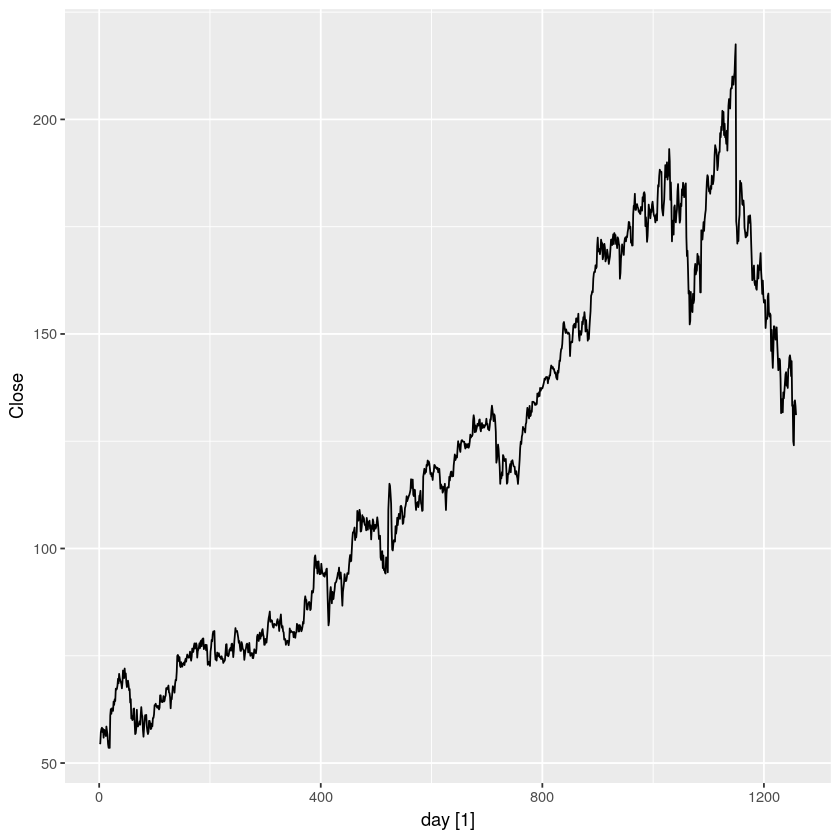

In [24]:
fb_stock %>%
    autoplot(Close)

## b.

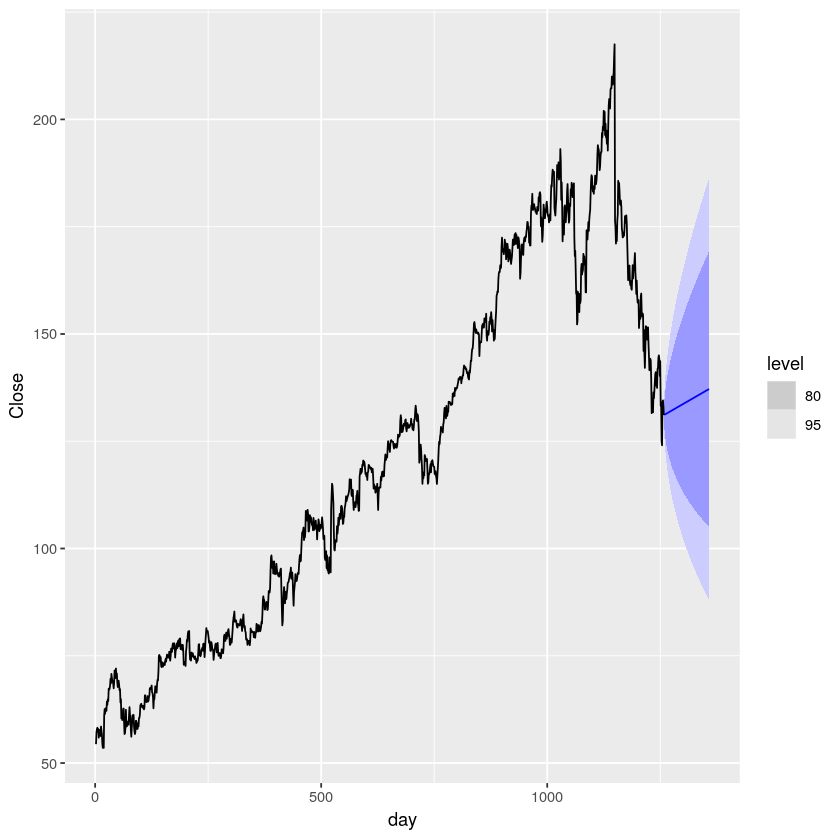

In [25]:
fit_drift <- fb_stock %>%
    model(RW(Close ~ drift()))

fit_drift %>%
    forecast(h=100) %>% #100 steps so it's visible
    autoplot(fb_stock)

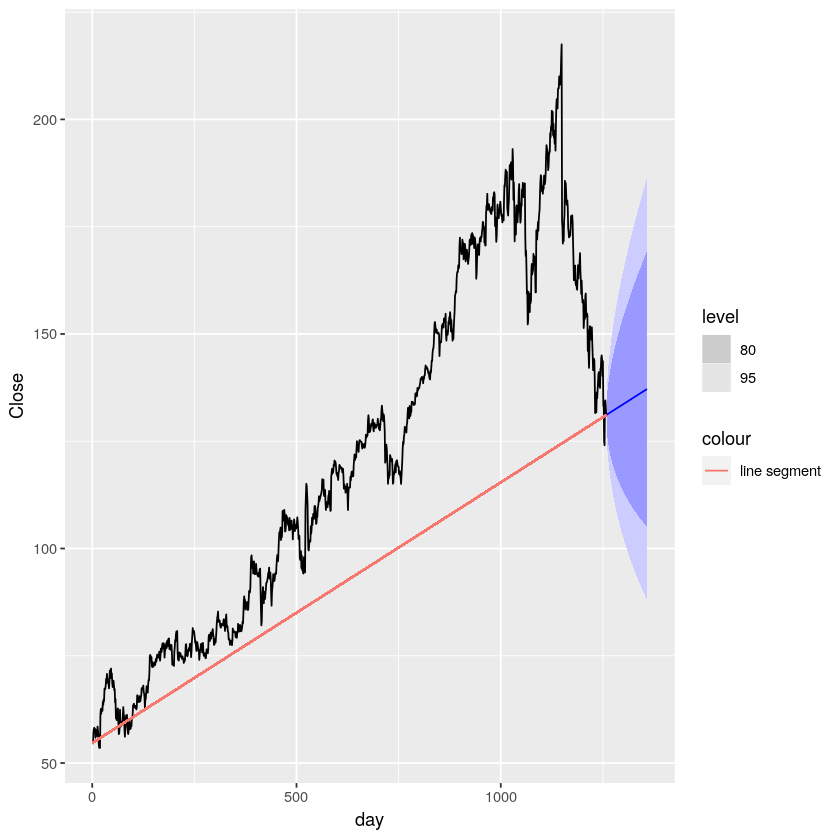

In [26]:
#get first and last observations
first_ob <- fb_stock[1,]
last_ob <- fb_stock[length(fb_stock$Close),]

fit_drift %>%
    forecast(h=100) %>% #100 steps so it's visible
    autoplot(fb_stock) +
    geom_segment(aes(x = first_ob$day, y = first_ob$Close, xend = last_ob$day, yend = last_ob$Close, colour='line segment'))

## d.

### `DRIFT`

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

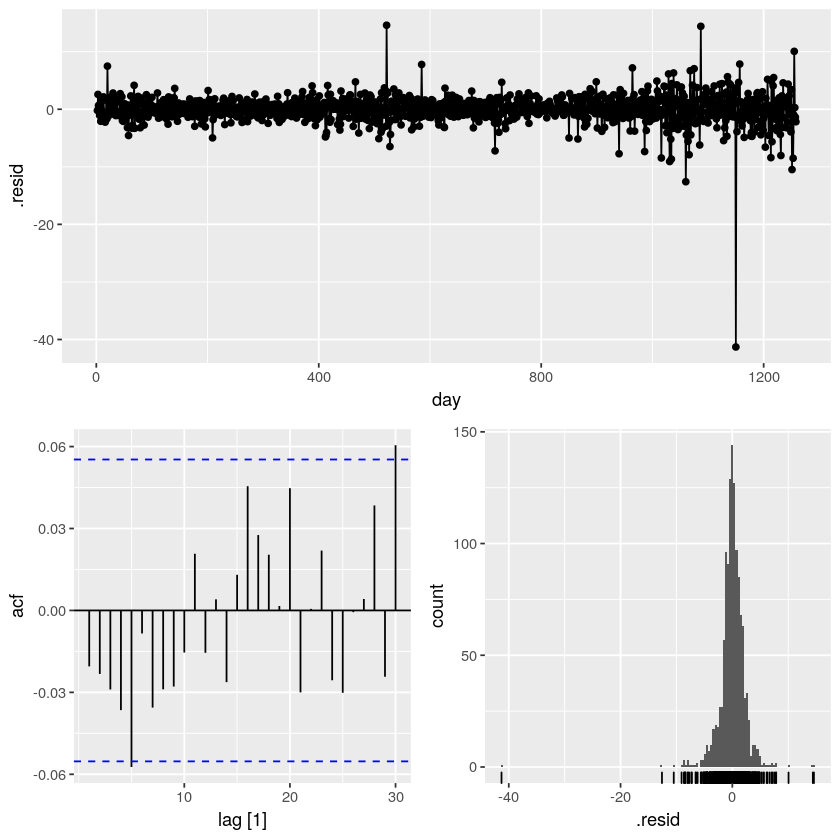

In [27]:
fit_drift %>%
    gg_tsresiduals()

### `NAIVE`

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

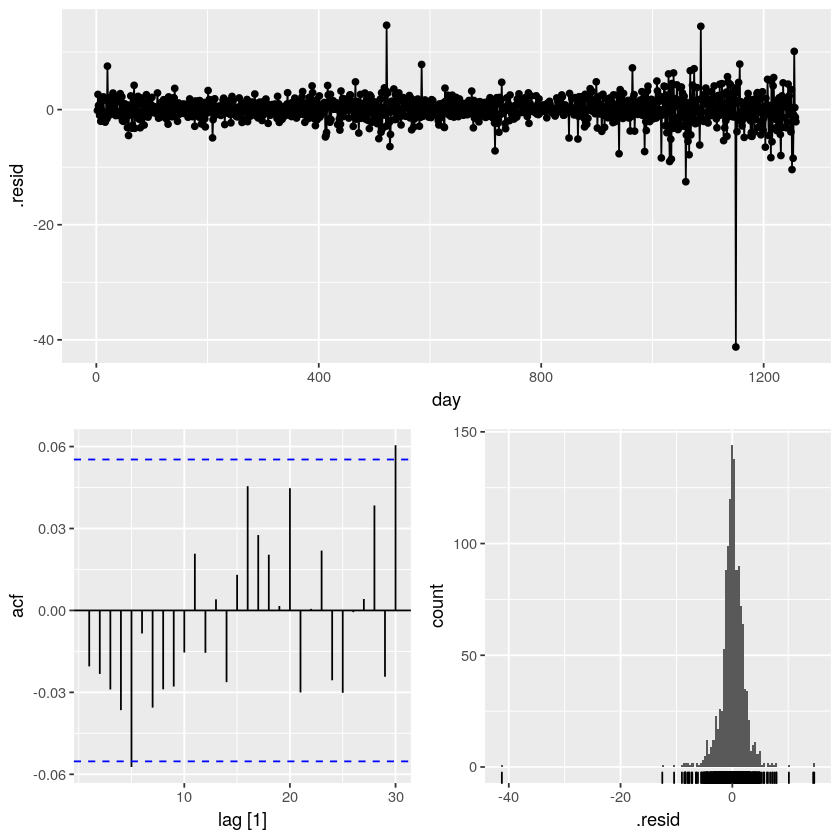

In [28]:
fit_naive <- fb_stock %>%
    model(NAIVE(Close))

fit_naive %>%
    gg_tsresiduals()

### `MEAN`

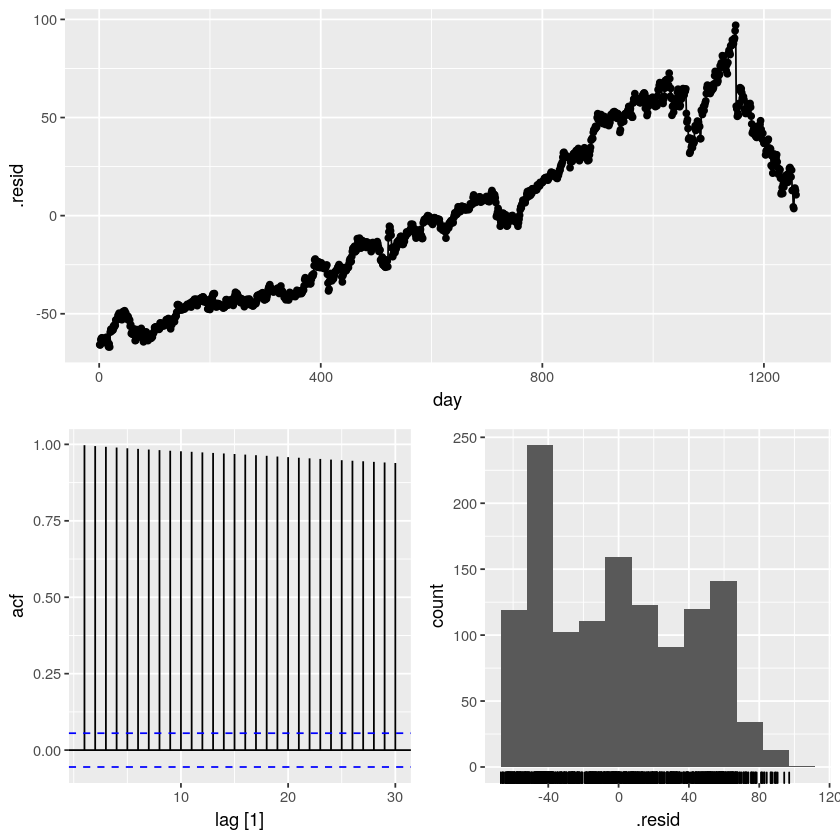

In [29]:
fit_mean <- fb_stock %>%
    model(MEAN(Close))

fit_mean %>%
    gg_tsresiduals()

Because the data is not seasonal, `SNAIVE` is not a viable benchmark method.

The `MEAN` method is also not a very good method since it adapts far too slowly to changes in `Close` day-to-day.

The `DRIFT` method would be a bad choice in the longrun since, if `Close` prices continue to be above the first closing price in the dataset, the drift method will sytematically always forecast a higher value than the most recent observed value. This is a clear example of bias.

Because this time series will ultimately be random and chaotic into the future, the best benchmark method would be the `NAIVE` forecast method.

# 3.

In [30]:
print(aus_production)

# A tsibble: 218 x 7 [1Q]
   Quarter  Beer Tobacco Bricks Cement Electricity   Gas
     <qtr> <dbl>   <dbl>  <dbl>  <dbl>       <dbl> <dbl>
 1 1956 Q1   284    5225    189    465        3923     5
 2 1956 Q2   213    5178    204    532        4436     6
 3 1956 Q3   227    5297    208    561        4806     7
 4 1956 Q4   308    5681    197    570        4418     6
 5 1957 Q1   262    5577    187    529        4339     5
 6 1957 Q2   228    5651    214    604        4811     7
 7 1957 Q3   236    5317    227    603        5259     7
 8 1957 Q4   320    6152    222    582        4735     6
 9 1958 Q1   272    5758    199    554        4608     5
10 1958 Q2   233    5641    229    620        5196     7
# … with 208 more rows


Warning message:
“Removed 4 row(s) containing missing values (geom_path).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

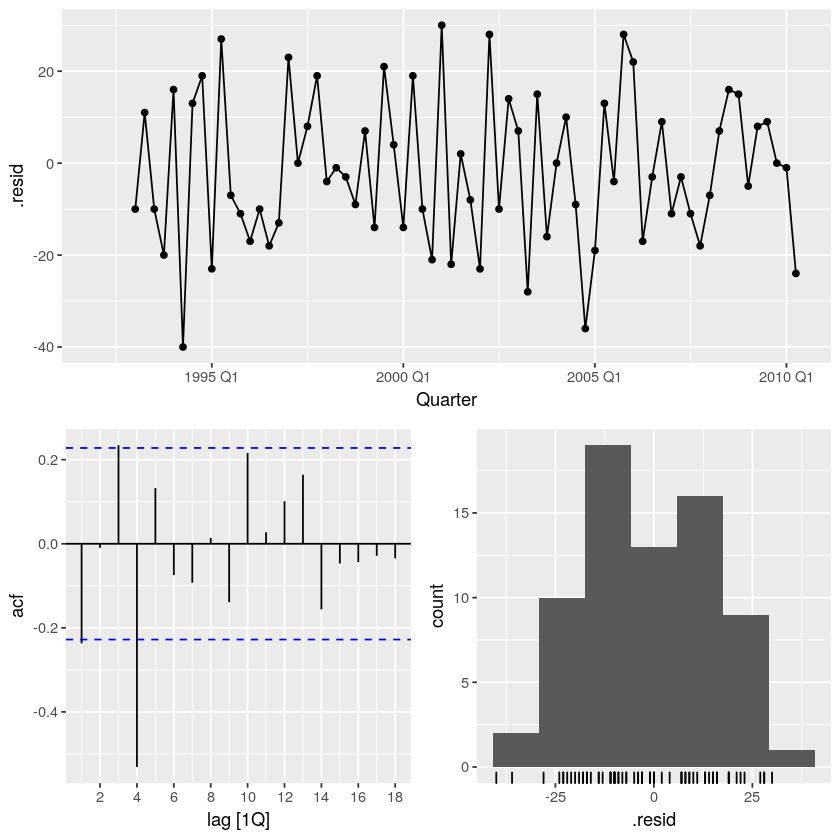

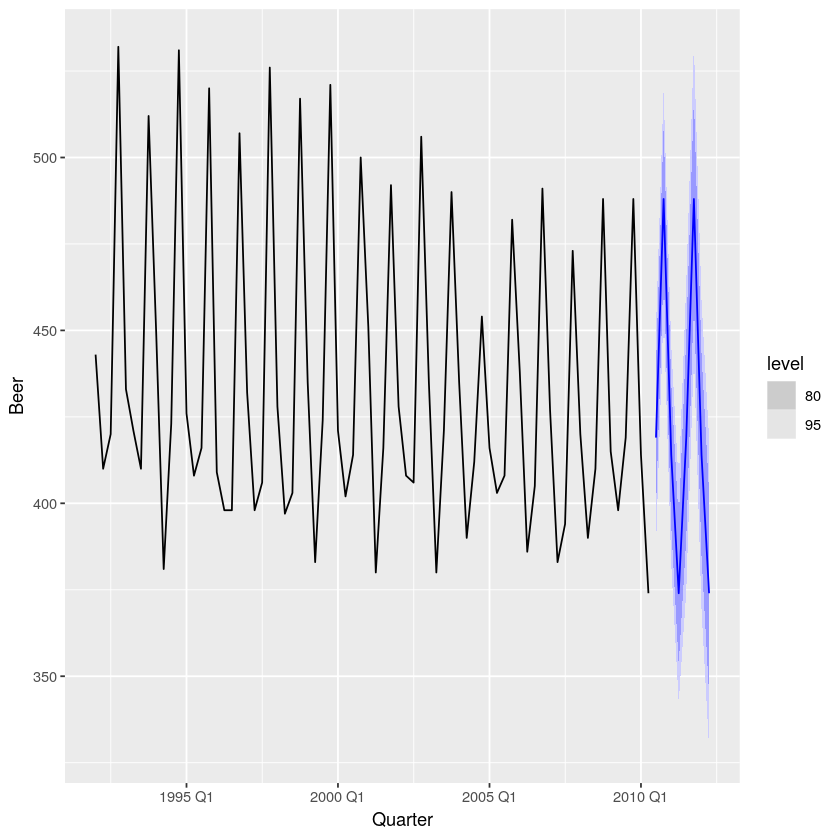

In [31]:
# Extract data of interest
recent_production <- aus_production %>%
  filter(year(Quarter) >= 1992)
# Define and estimate a model
fit <- recent_production %>% model(SNAIVE(Beer))
# Look at the residuals
fit %>% gg_tsresiduals()
# Look a some forecasts
fit %>% forecast() %>% autoplot(recent_production)

In observing the the ACF plot, it is clear that the residuals do not constitute white noise.

# 4.

## Australian Exports series from `global_economy`

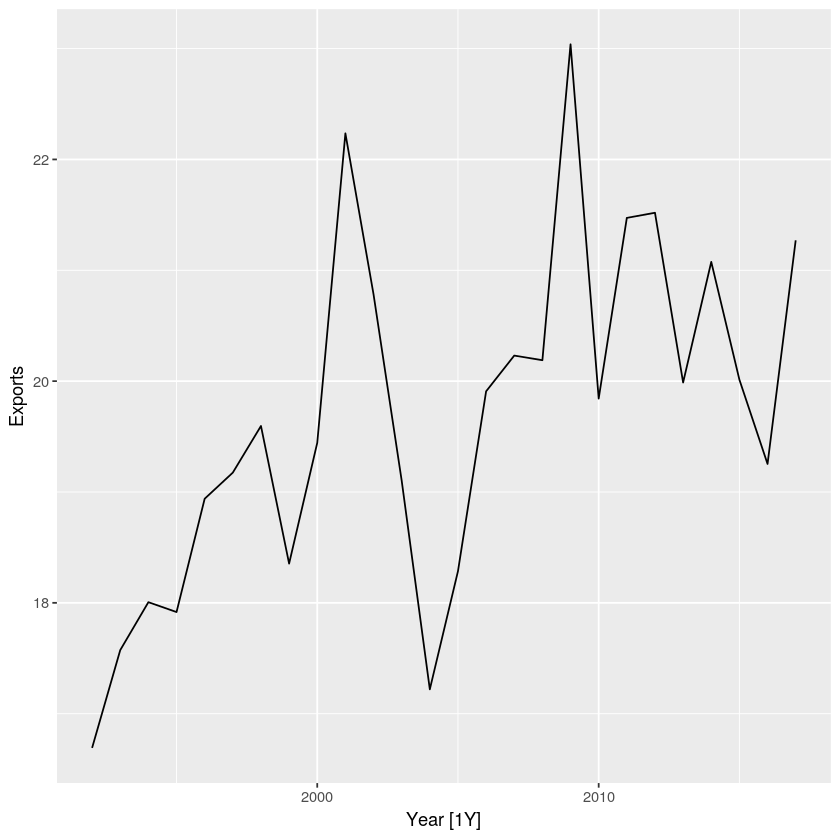

In [32]:
recent_aus_economy <- global_economy %>%
    filter(Country == "Australia", Year >= 1992)

recent_aus_economy %>%
    autoplot(Exports)

Because this data is non-seasonal (which one observation per year), a `NAIVE` forecast is more appropriate.

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

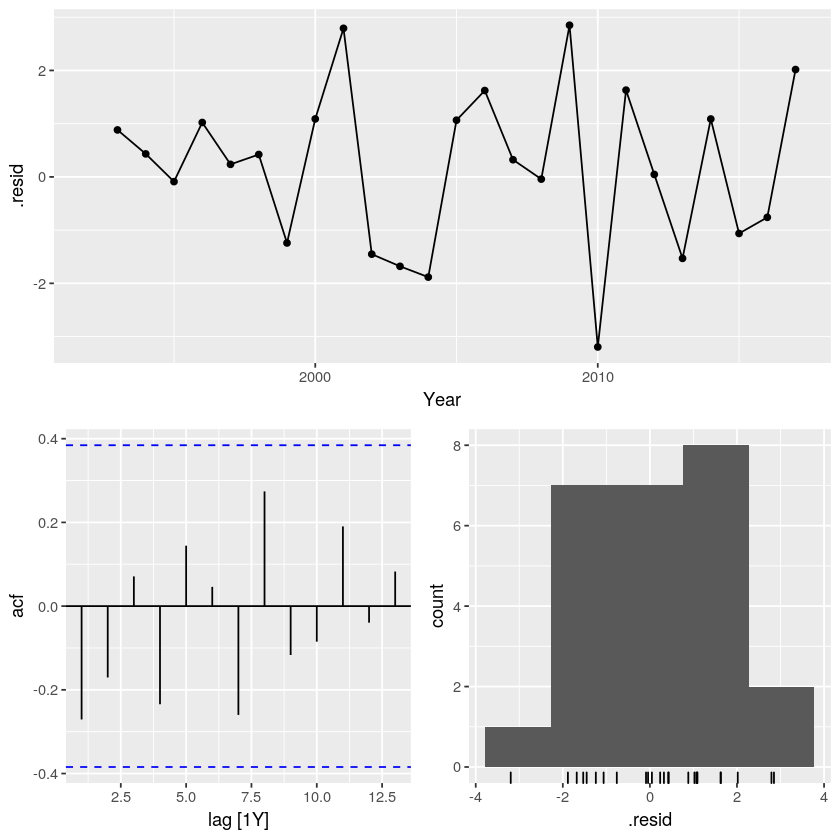

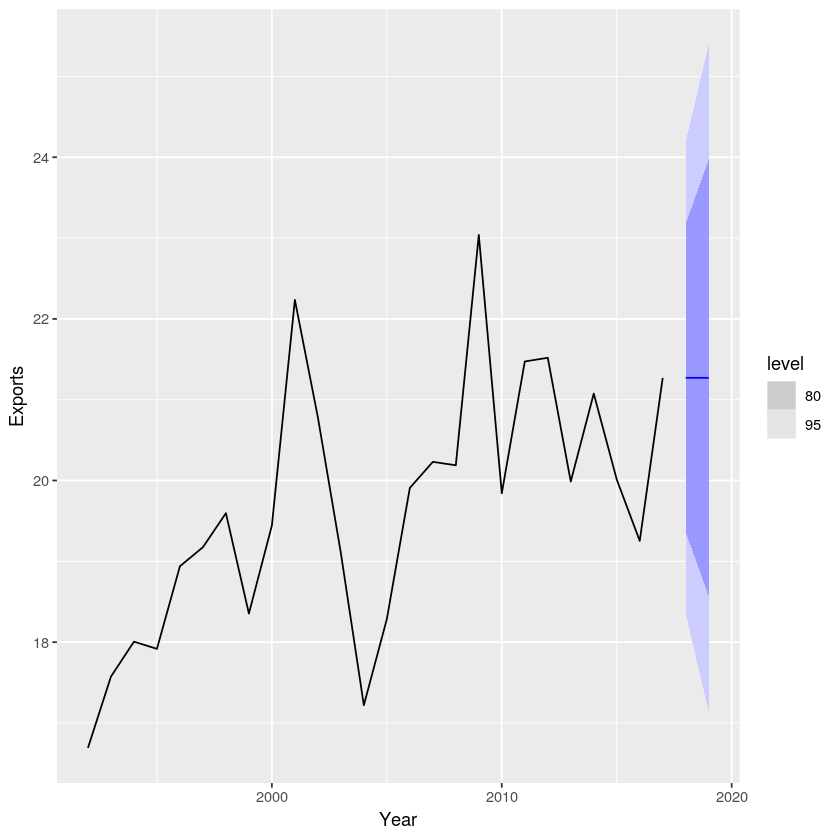

In [33]:
fit <- recent_aus_economy %>% model(NAIVE(Exports))

fit %>% gg_tsresiduals()

fit %>% forecast() %>% autoplot(recent_aus_economy)

In observing the ACF plot above, it would appear that the residuals are white noise.

## Bricks series from `aus_production`

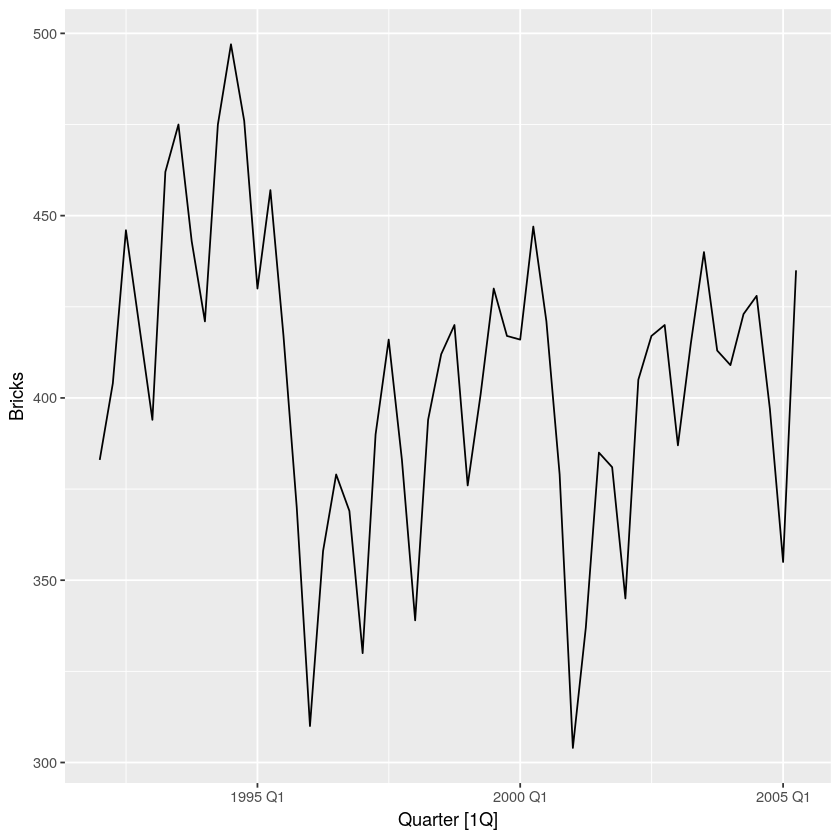

In [34]:
#stop at 2005 Q2 since there are just na's beyond
recent_production <- aus_production %>%
    filter_index("1992 Q1" ~ "2005 Q2")

recent_production %>%
    autoplot(Bricks)

Because this data is seasonal it would be more appropriate to use `SNAIVE` than it would to use `NAIVE`.

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

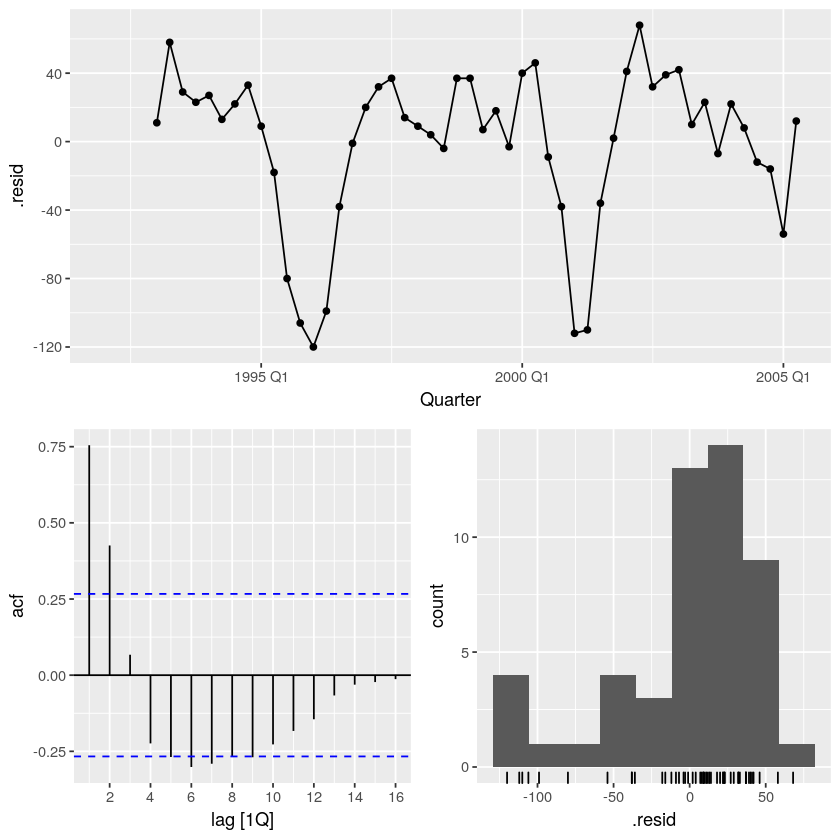

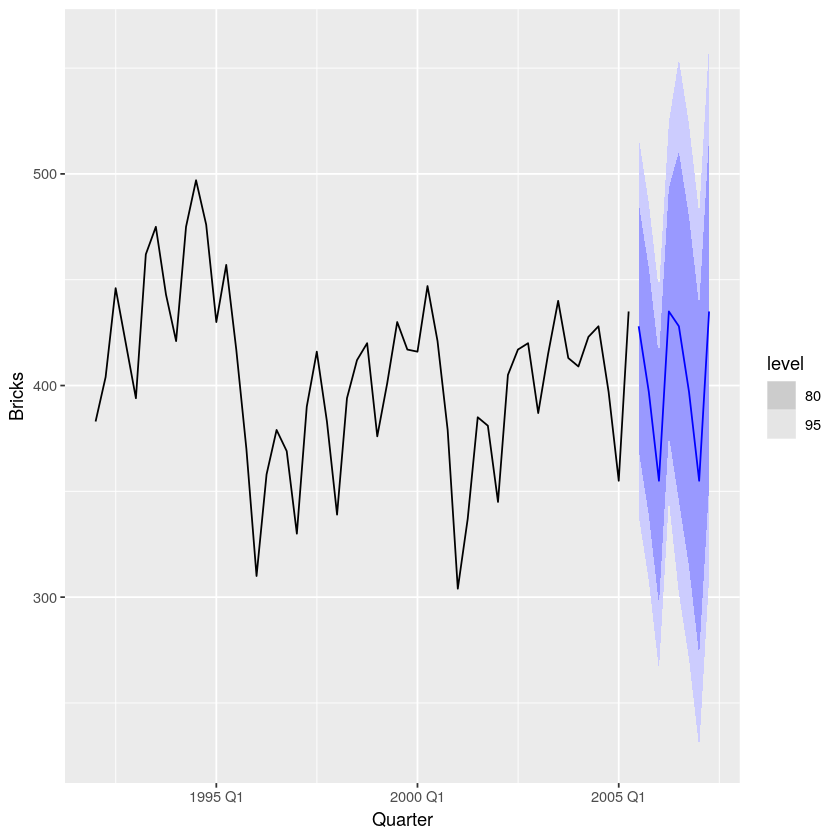

In [35]:
fit <- recent_production %>% model(SNAIVE(Bricks))

fit %>% gg_tsresiduals()

fit %>% forecast() %>% autoplot(recent_production)

In observing the ACF plot above, it is clear that the residuals are not white noise.

# 5.

In [36]:
vic_livestock <- aus_livestock %>%
    filter(State == "Victoria")

print(vic_livestock)

# A tsibble: 3,810 x 4 [1M]
# Key:       Animal, State [7]
      Month Animal                     State     Count
      <mth> <fct>                      <fct>     <dbl>
 1 1976 Jul Bulls, bullocks and steers Victoria 109200
 2 1976 Aug Bulls, bullocks and steers Victoria  94700
 3 1976 Sep Bulls, bullocks and steers Victoria  95500
 4 1976 Oct Bulls, bullocks and steers Victoria  94800
 5 1976 Nov Bulls, bullocks and steers Victoria  94100
 6 1976 Dec Bulls, bullocks and steers Victoria  98300
 7 1977 Jan Bulls, bullocks and steers Victoria  93500
 8 1977 Feb Bulls, bullocks and steers Victoria 102000
 9 1977 Mar Bulls, bullocks and steers Victoria 102600
10 1977 Apr Bulls, bullocks and steers Victoria  91500
# … with 3,800 more rows


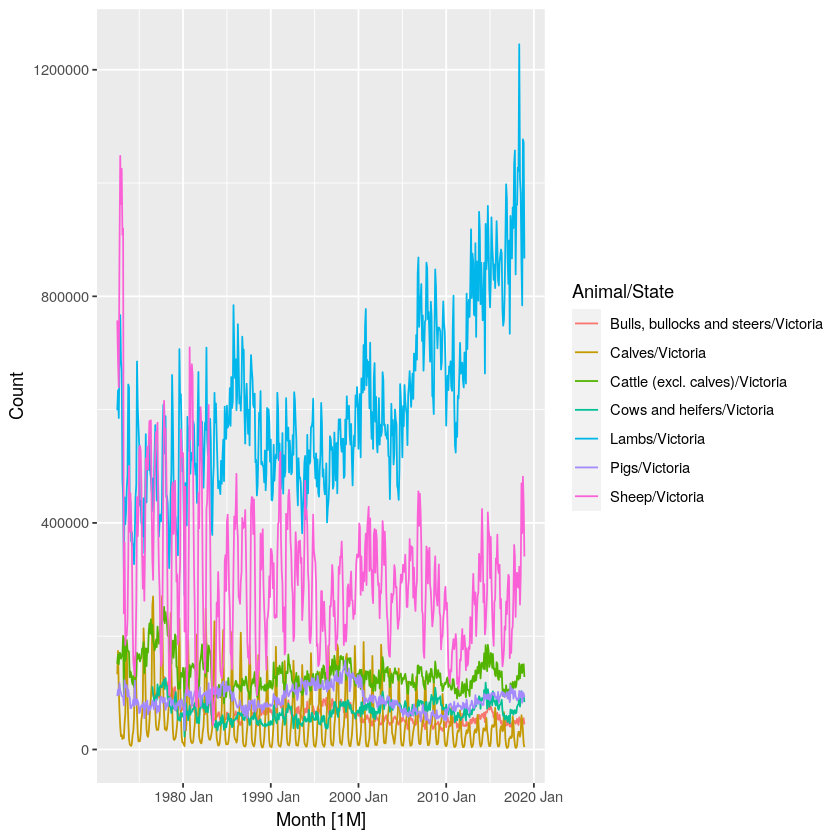

In [37]:
vic_livestock %>%
    autoplot(Count)

In [38]:
fit <- vic_livestock %>%
    model(SNAIVE(Count))

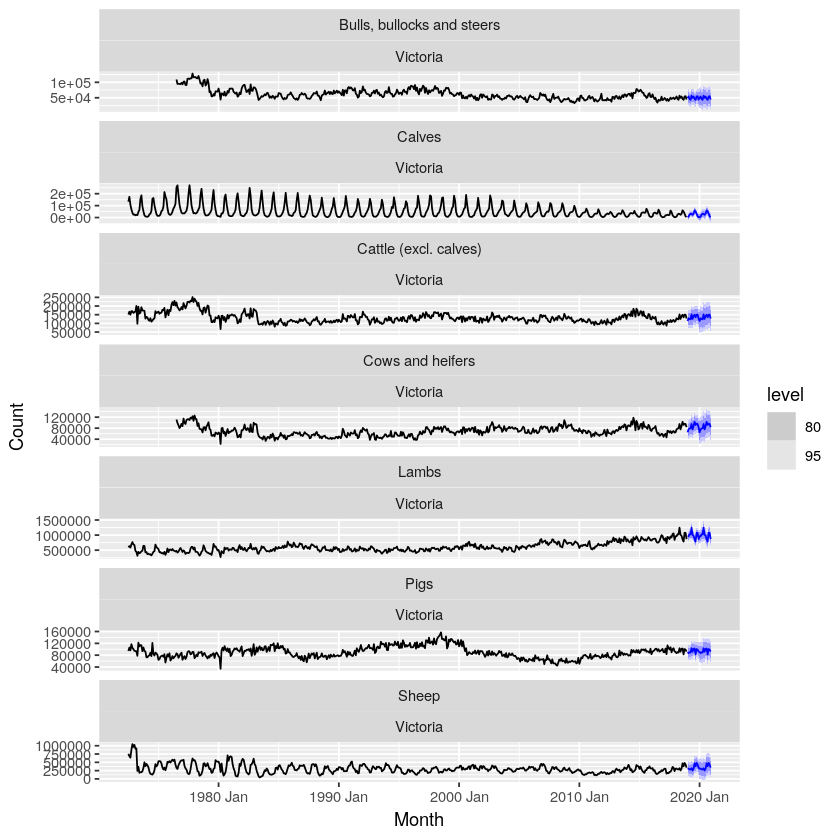

In [39]:
fit %>%
    forecast() %>%
    autoplot(vic_livestock)

Given that there is seasonality in the data, and that the other common benchmark methods do not do a very good job of capturing seasonality, I believe that the `SNAIVE` forecast is reasonable for these series.

# 6.

- **a**. *False*. While having normally distributed residuals can be useful for constructing prediction intervals, it is not necessary for the distribution to be normal for the predictions to be accurate.
- **b**. *False*. It is possible that even though a forecast can produce small residuals, for it still to be biased.
- **c**. *False*. While MAPE does have its advantages in certain contexts, it does have weaknesses which prevent it from being the 'best' measure of forecast accuracy. For example, MAPE is undefined when the data it is computed on 0's.
- **d**. *False*. While making a model more complex can often improve your forecasts, you also run the risk of overfitting your model to the data, which can often produce forecasts which are much much worse than before.
- **e**. *False*. You should choose the model with the best forecast accuracy only in the case where that is what matters most. In the real world, a less complex model with lower accuracy may be preffered to a more complex model with higher accuracy since the less complex model could be easier to understand and to maintain. 

# 7.

In [40]:
set.seed(2021)
myseries <- aus_retail %>%
  filter(`Series ID` == sample(aus_retail$`Series ID`,1))

## a.

In [41]:
myseries_train <- myseries %>%
  filter(year(Month) < 2011)

## b.

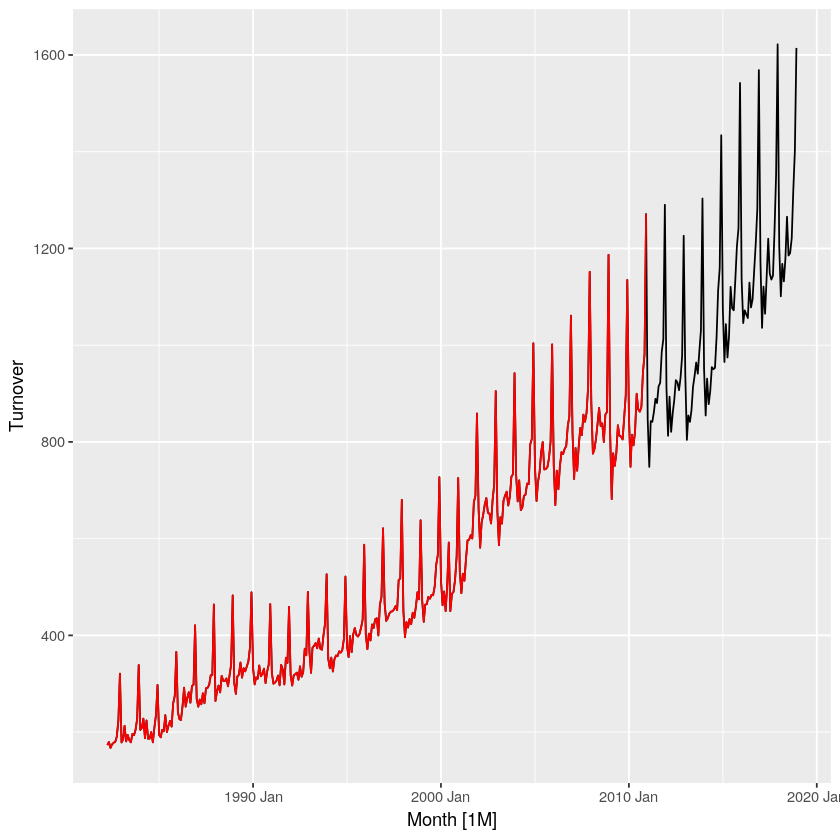

In [42]:
autoplot(myseries, Turnover) +
  autolayer(myseries_train, Turnover, colour = "red")

## c.

In [43]:
fit <- myseries_train %>%
  model(SNAIVE(Turnover))

## d.

Warning message:
“Removed 12 row(s) containing missing values (geom_path).”Warning message:
“Removed 12 rows containing missing values (geom_point).”Warning message:
“Removed 12 rows containing non-finite values (stat_bin).”

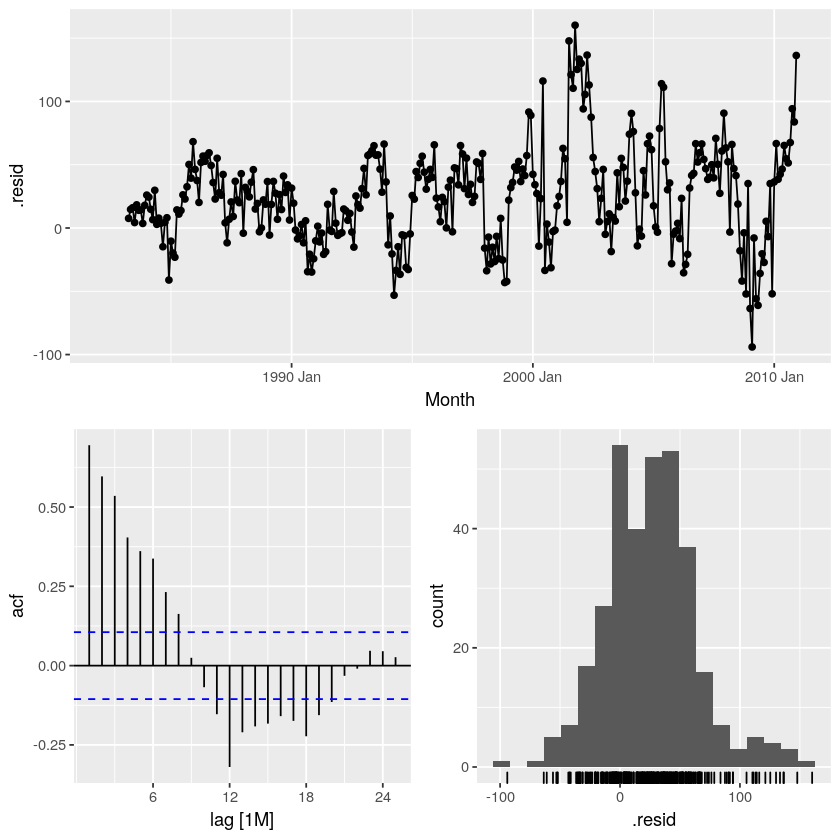

In [44]:
fit %>% gg_tsresiduals()

From observing the ACF scores, it would appear that the residuals are very likely not uncorrelated.

The residual distribution has a fat right tail suggesting that the residuals are not normally distributed.

## e.

Joining, by = c("State", "Industry", "Series ID", "Month", "Turnover")


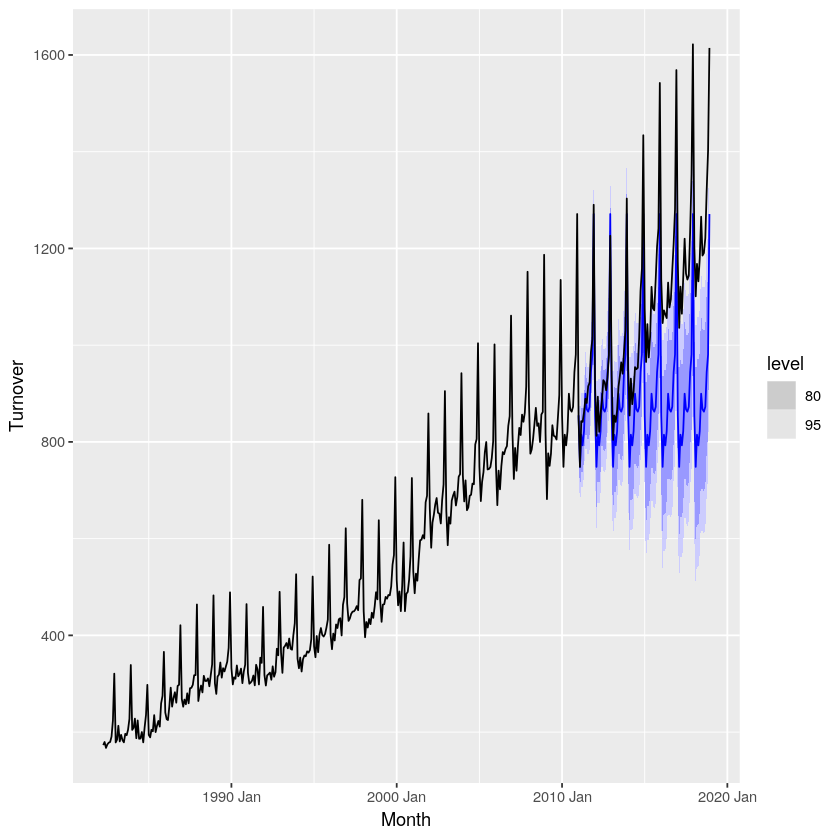

In [45]:
fc <- fit %>%
  forecast(new_data = anti_join(myseries, myseries_train))
fc %>% autoplot(myseries)

## f.

In [46]:
fit %>% accuracy()
fc %>% accuracy(myseries)

State    Industry                  .model           .type    ME      
1 Victoria Household goods retailing SNAIVE(Turnover) Training 25.12853
  RMSE     MAE      MPE     MAPE    MASE RMSSE ACF1     
1 45.56181 35.43544 5.04889 7.29382 1    1     0.6948428

.model           State    Industry                  .type ME       RMSE    
1 SNAIVE(Turnover) Victoria Household goods retailing Test  171.6625 213.4118
  MAE      MPE      MAPE     MASE     RMSSE    ACF1     
1 173.5167 15.07044 15.24918 4.896699 4.684005 0.9469268

## g.

### Small amount of training data:

Joining, by = c("State", "Industry", "Series ID", "Month", "Turnover")


State    Industry                  .model           .type    ME      
1 Victoria Household goods retailing SNAIVE(Turnover) Training 23.62679
  RMSE     MAE    MPE      MAPE    MASE RMSSE ACF1     
1 44.34137 34.319 4.971608 7.30046 1    1     0.6979704

.model           State    Industry                  .type ME       RMSE    
1 SNAIVE(Turnover) Victoria Household goods retailing Test  217.8889 256.2913
  MAE      MPE      MAPE     MASE     RMSSE   ACF1     
1 217.8889 19.57045 19.57045 6.348928 5.77996 0.9374642

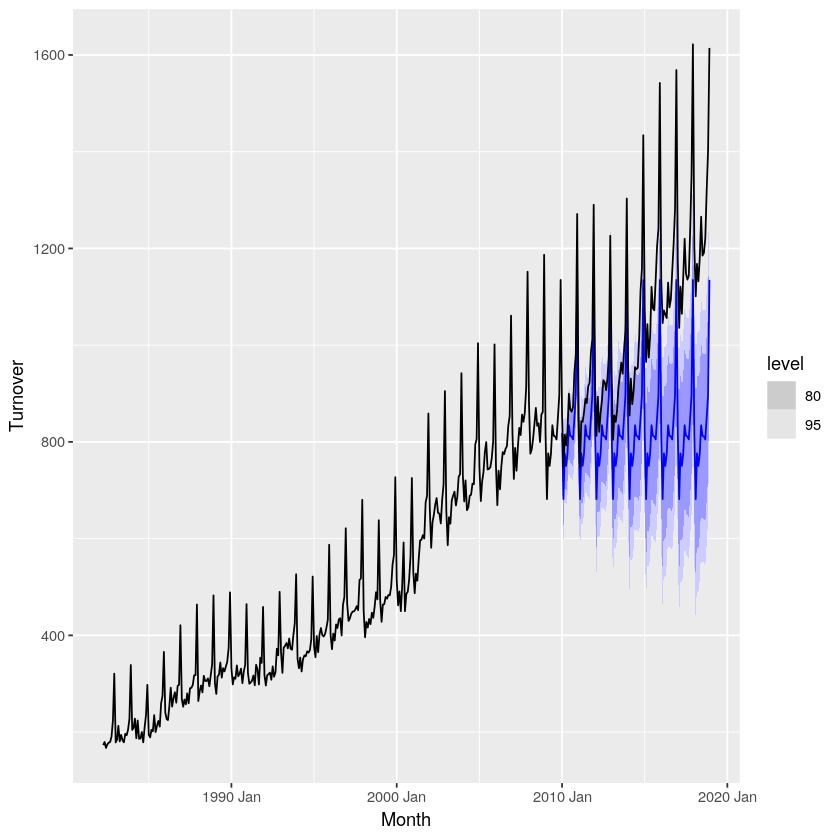

In [47]:
myseries_train_small <- myseries %>%
  filter(year(Month) < 2010)#2000 instead of 2010

fit_small <- myseries_train_small %>%
  model(SNAIVE(Turnover))

fc_small <- fit_small %>%
  forecast(new_data = anti_join(myseries, myseries_train_small))
fc_small %>% autoplot(myseries)

fit_small %>% accuracy()
fc_small %>% accuracy(myseries)

### Large amount of training data:

Joining, by = c("State", "Industry", "Series ID", "Month", "Turnover")


State    Industry                  .model           .type    ME      
1 Victoria Household goods retailing SNAIVE(Turnover) Training 25.13826
  RMSE     MAE      MPE      MAPE     MASE RMSSE ACF1     
1 45.18975 35.18928 4.968838 7.147461 1    1     0.6834515

.model           State    Industry                  .type ME       RMSE    
1 SNAIVE(Turnover) Victoria Household goods retailing Test  167.1476 207.7421
  MAE      MPE      MAPE     MASE    RMSSE    ACF1     
1 171.6976 14.43524 14.88889 4.87926 4.597106 0.9274858

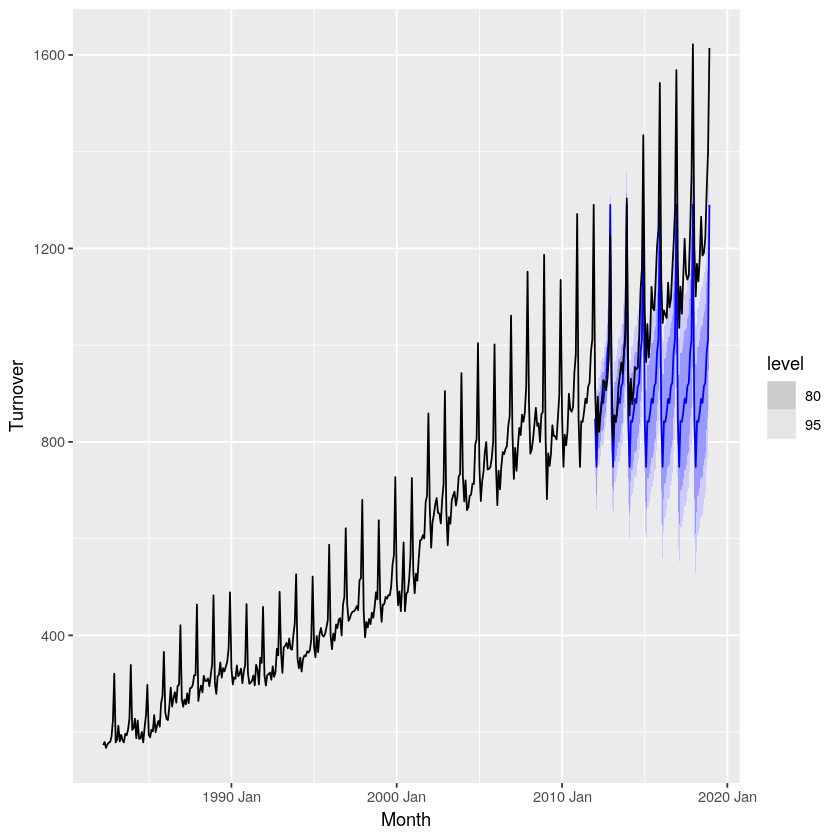

In [48]:
myseries_train_large <- myseries %>%
  filter(year(Month) < 2012)#2012 instead of 2011

fit_large <- myseries_train_large %>%
  model(SNAIVE(Turnover))

fc_large <- fit_large %>%
  forecast(new_data = anti_join(myseries, myseries_train_large))
fc_large %>% autoplot(myseries)

fit_large %>% accuracy()
fc_large %>% accuracy(myseries)

As we can see from the above forecasts, when their is more training data, the traning set error is larger whereas, when there is less training data, the training set error is smaller.

However, for the test set error it is the opposite. As the training set becomes larger, the test set error becomes smaller and when the training set becomes smaller the test set error becomes larger.

# 8.

In [49]:
#lambs in new south wales
nsw_pigs <- aus_livestock %>%
    filter(Animal == "Pigs", State == "New South Wales")

## a.

In [50]:
print(nsw_pigs)

# A tsibble: 558 x 4 [1M]
# Key:       Animal, State [1]
      Month Animal State            Count
      <mth> <fct>  <fct>            <dbl>
 1 1972 Jul Pigs   New South Wales  97400
 2 1972 Aug Pigs   New South Wales 114700
 3 1972 Sep Pigs   New South Wales 109900
 4 1972 Oct Pigs   New South Wales 108300
 5 1972 Nov Pigs   New South Wales 122200
 6 1972 Dec Pigs   New South Wales 106900
 7 1973 Jan Pigs   New South Wales  96600
 8 1973 Feb Pigs   New South Wales  96700
 9 1973 Mar Pigs   New South Wales 121200
10 1973 Apr Pigs   New South Wales  99300
# … with 548 more rows


In [51]:
print(tail(nsw_pigs))

# A tsibble: 6 x 4 [1M]
# Key:       Animal, State [1]
     Month Animal State           Count
     <mth> <fct>  <fct>           <dbl>
1 2018 Jul Pigs   New South Wales 71900
2 2018 Aug Pigs   New South Wales 73600
3 2018 Sep Pigs   New South Wales 76800
4 2018 Oct Pigs   New South Wales 71500
5 2018 Nov Pigs   New South Wales 68100
6 2018 Dec Pigs   New South Wales 76800


### Timeplot:

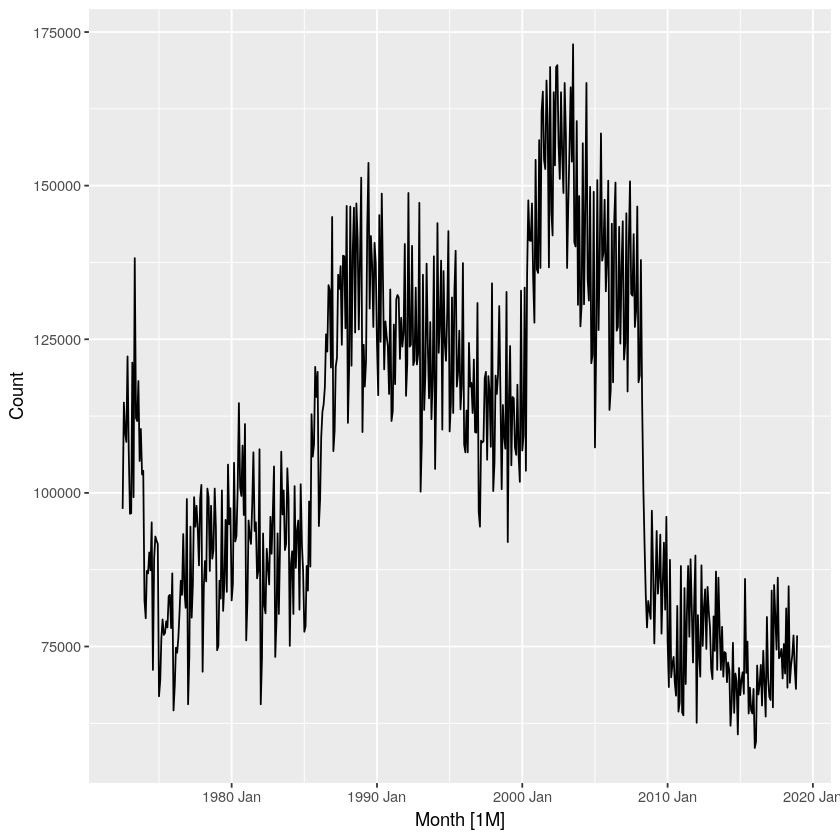

In [52]:
nsw_pigs %>%
    autoplot(Count)

There appears to be a lot of cyclic behaviour in this data.

### Seasonal Plot:

Warning message in NextMethod("["):
“Incompatible methods (">=.Date", ">=.vctrs_vctr") for ">="”Warning message in NextMethod("["):
“Incompatible methods ("<=.Date", "<=.vctrs_vctr") for "<="”Warning message in NextMethod("["):
“Incompatible methods (">=.Date", ">=.vctrs_vctr") for ">="”Warning message in NextMethod("["):
“Incompatible methods ("<=.Date", "<=.vctrs_vctr") for "<="”

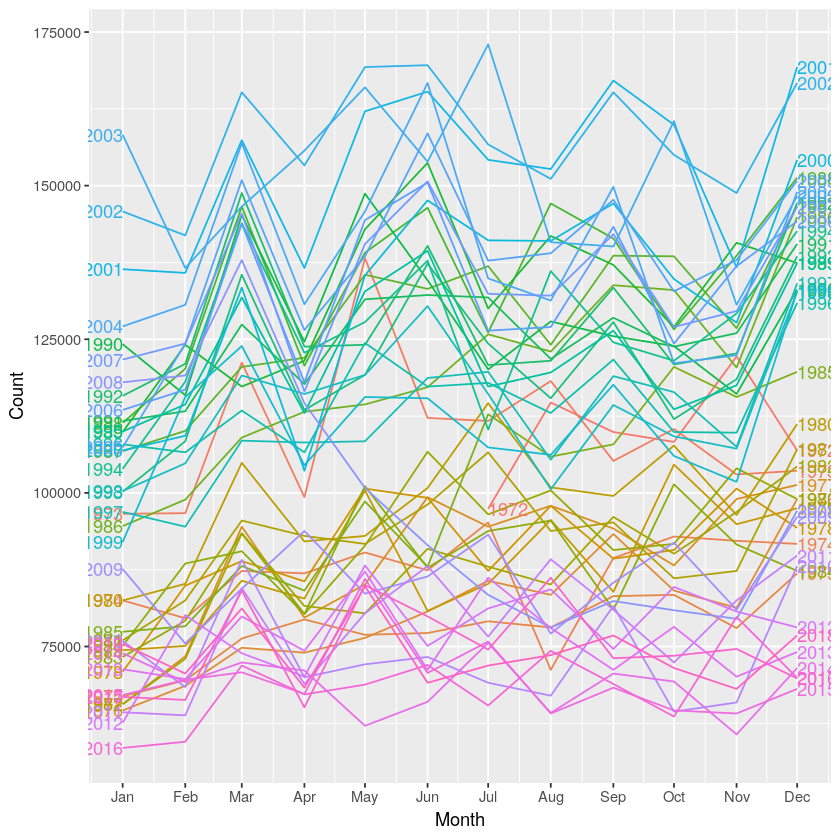

In [53]:
nsw_pigs %>%
    gg_season(Count, labels = "both")

There appears to be some light seasonality in this data.

## b.

In [54]:
#training set
nsw_pigs_tr <- nsw_pigs %>%
    slice(1:486)

#test set
nsw_pigs_te <- nsw_pigs %>%
    slice(n()-71:0)

## c.

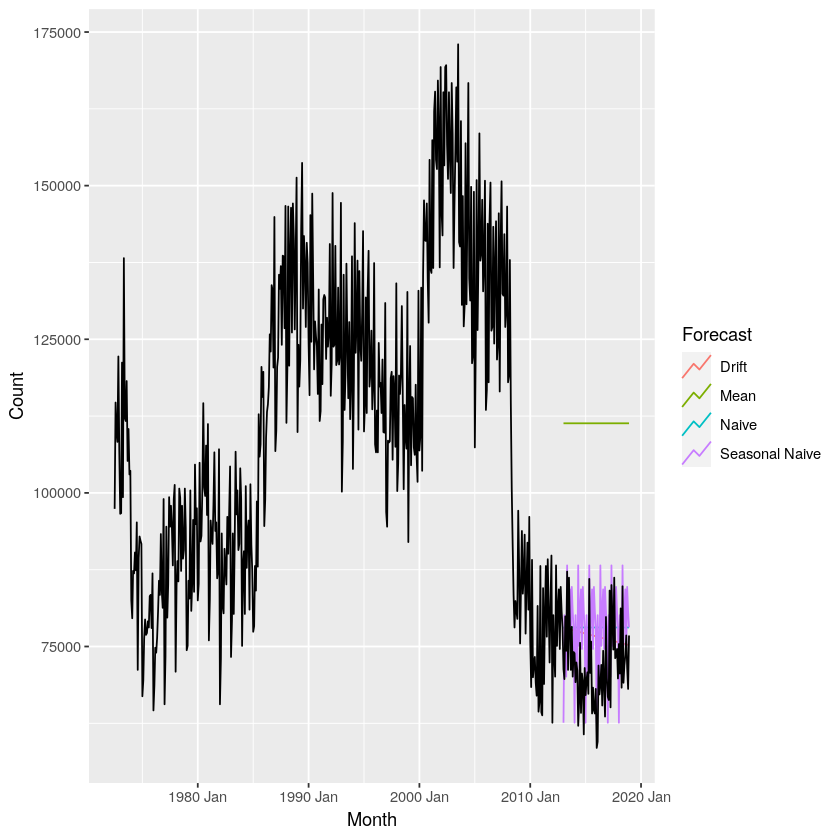

In [55]:
#fit various benchmark methods on training set
nsw_pigs_fit <- nsw_pigs_tr %>%
    model(
        Mean = MEAN(Count),
        Naive = NAIVE(Count),
        `Seasonal Naive` = SNAIVE(Count),
        Drift = RW(Count ~ drift())
    )

#create forecasts for test data
nsw_pigs_fc <- nsw_pigs_fit %>%
    forecast(nsw_pigs_te)

#plot the forecasts
nsw_pigs_fc %>%
    autoplot(nsw_pigs, level = NULL) +
    guides(colour = guide_legend(title = "Forecast"))

In [56]:
accuracy(nsw_pigs_fc, nsw_pigs) %>%
    select(.model, RMSE, MAE, MAPE, MASE)

.model         RMSE      MAE       MAPE     MASE     
1 Drift           8091.302  6967.191 10.07446 0.6572821
2 Mean           39893.665 39360.340 55.92788 3.7132396
3 Naive           8940.754  7840.278 11.39741 0.7396488
4 Seasonal Naive 10111.428  8173.611 11.86561 0.7710954

The `DRIFT` method did the best on the test set according to each error metric.

## d.

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

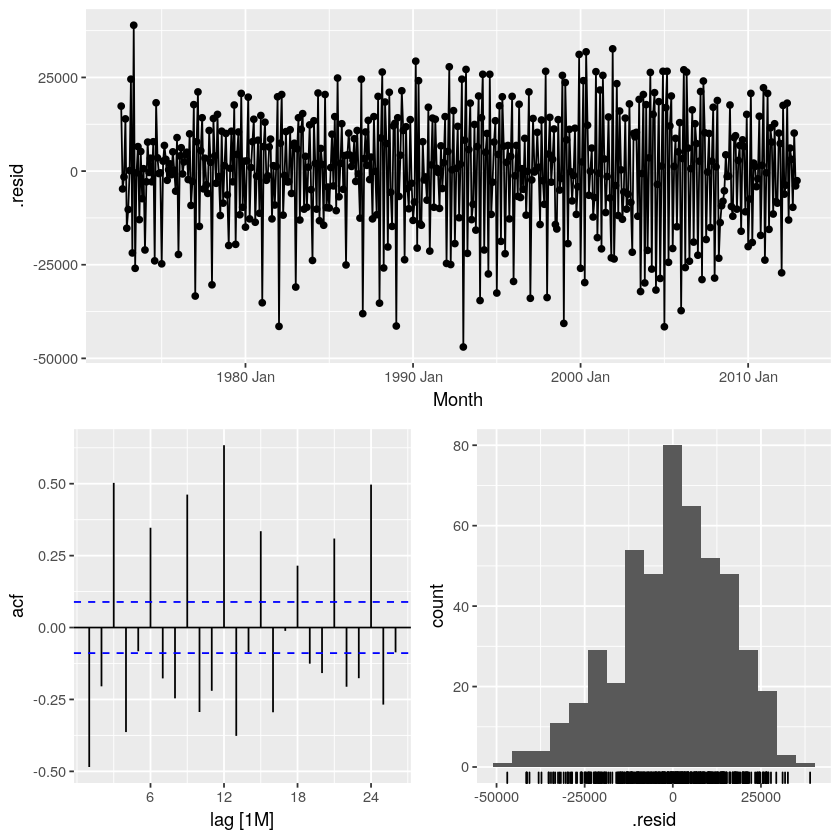

In [57]:
nsw_pigs_fit %>%
    select(-Mean, -Naive, -`Seasonal Naive`) %>%
    gg_tsresiduals()

No, the residuals of the `DRIFT` method do not resemble white noise.

# 9.

In [58]:
print(hh_budget)

# A tsibble: 88 x 8 [1Y]
# Key:       Country [4]
   Country    Year  Debt     DI Expenditure Savings Wealth Unemployment
   <chr>     <dbl> <dbl>  <dbl>       <dbl>   <dbl>  <dbl>        <dbl>
 1 Australia  1995  95.7 3.72          3.40   5.24    315.         8.47
 2 Australia  1996  99.5 3.98          2.97   6.47    315.         8.51
 3 Australia  1997 108.  2.52          4.95   3.74    323.         8.36
 4 Australia  1998 115.  4.02          5.73   1.29    339.         7.68
 5 Australia  1999 121.  3.84          4.26   0.638   354.         6.87
 6 Australia  2000 126.  3.77          3.18   1.99    350.         6.29
 7 Australia  2001 132.  4.36          3.10   3.24    348.         6.74
 8 Australia  2002 149.  0.0218        4.03  -1.15    349.         6.37
 9 Australia  2003 159.  6.06          5.04  -0.413   360.         5.93
10 Australia  2004 170.  5.53          4.54   0.657   379.         5.40
# … with 78 more rows


## a.

In [59]:
#training set
hh_budget_tr <- hh_budget %>%
    filter(Year < 2013)

#test set
hh_budget_te <- hh_budget %>%
    filter(Year >= 2013)

## b.

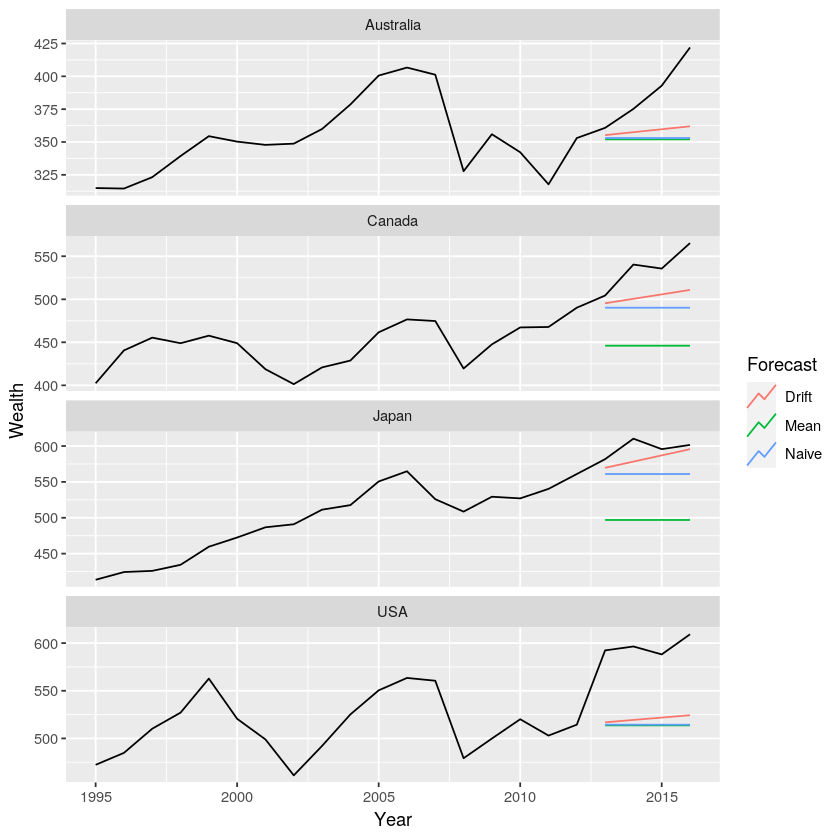

In [60]:
#fit various benchmark methods on training set
#can't fit SNAIVE since the data is non-seasonal
hh_budget_fit <- hh_budget_tr %>%
    model(
        Mean = MEAN(Wealth),
        Naive = NAIVE(Wealth),
        Drift = RW(Wealth ~ drift())
    )

#create forecasts for test data
hh_budget_fc <- hh_budget_fit %>%
    forecast(hh_budget_te)

#plot the forecasts
hh_budget_fc %>%
    autoplot(hh_budget, level = NULL) +
    guides(colour = guide_legend(title = "Forecast"))

## c.

In [61]:
accuracy(hh_budget_fc, hh_budget) %>%
    select(.model, Country, RMSE, MAE, MAPE, MASE)

.model Country   RMSE      MAE       MAPE      MASE     
1  Drift  Australia  35.51998  29.10948  7.230396 1.7293990
2  Drift  Canada     37.15765  33.28319  6.090020 1.7267342
3  Drift  Japan      17.86926  14.66153  2.439078 0.9425805
4  Drift  USA        76.22863  75.94019 12.718118 2.8825204
5  Mean   Australia  42.33502  35.65858  8.888217 2.1184823
6  Mean   Canada     92.93345  90.37015 16.709273 4.6884098
7  Mean   Japan     100.93075 100.39536 16.783048 6.4543547
8  Mean   USA        83.25365  82.87757 13.877602 3.1458481
9  Naive  Australia  41.53699  34.70738  8.642041 2.0619710
10 Naive  Canada     51.03896  46.20727  8.462883 2.3972368
11 Naive  Japan      37.79156  36.33750  6.055121 2.3361150
12 Naive  USA        82.51168  82.13220 13.752635 3.1175554

The `DRIFT` method produces the most accurate forecasts.

## d.

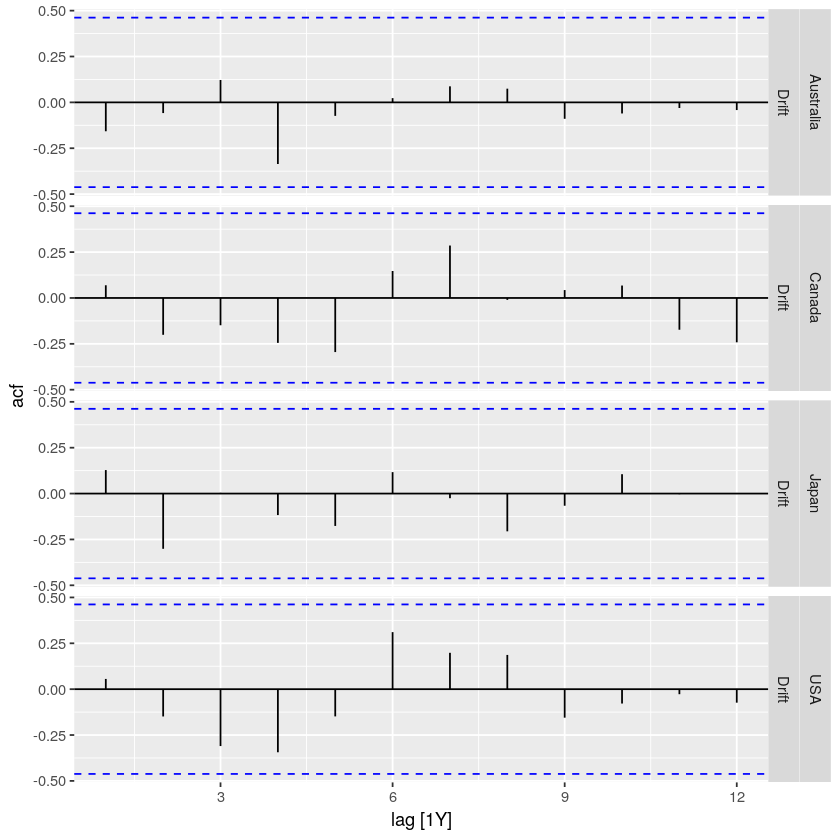

In [62]:
hh_budget_fit %>%
    select(-Mean, -Naive) %>% #select the Drift method
    augment() %>%
    ACF(.resid) %>%
    autoplot()

Yes, the residuals from the `DRIFT` method do resemble white noise.

# 10.

In [63]:
#we can use this data from earlier
print(takeaway)

# A tsibble: 3,456 x 5 [1M]
# Key:       State, Industry [8]
   State                      Industry             `Series ID`    Month Turnover
   <chr>                      <chr>                <chr>          <mth>    <dbl>
 1 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Apr      3.2
 2 Australian Capital Territ… Takeaway food servi… A3349850K   1982 May      3.3
 3 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Jun      3.5
 4 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Jul      3.5
 5 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Aug      3.7
 6 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Sep      3.9
 7 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Oct      4  
 8 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Nov      4.3
 9 Australian Capital Territ… Takeaway food servi… A3349850K   1982 Dec      4.3
10 Australian Capital Territ… Takeaway food serv

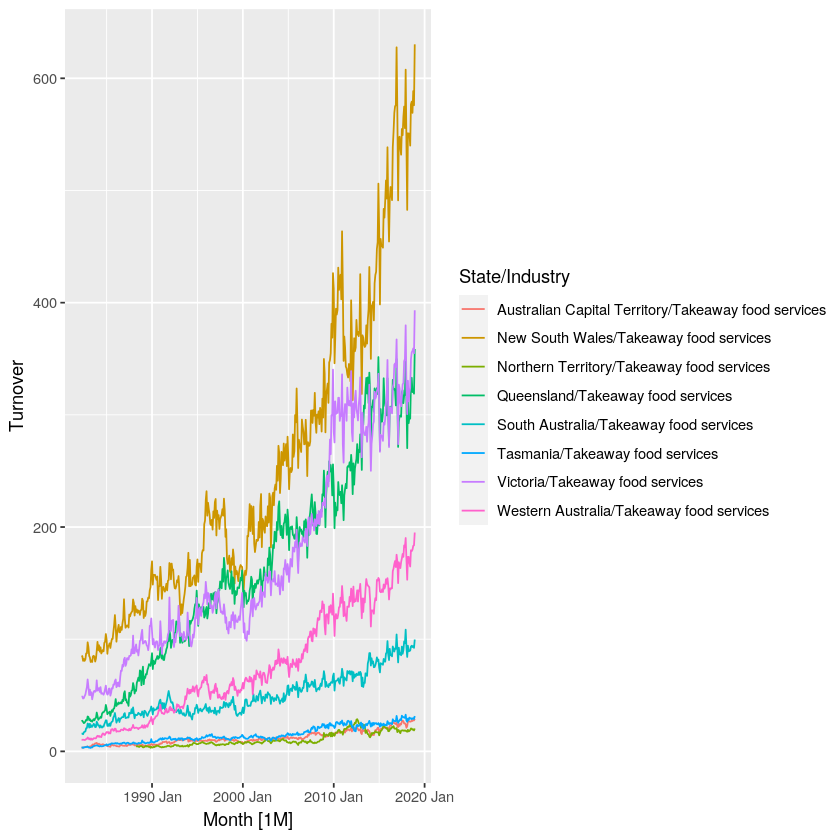

In [64]:
takeaway %>%
    autoplot(Turnover)

## a.

In [65]:
#training set
takeaway_tr <- takeaway %>%
    filter(year(Month) < 2015)

#test set
takeaway_te <- takeaway %>%
    filter(year(Month) >= 2015)

## b.

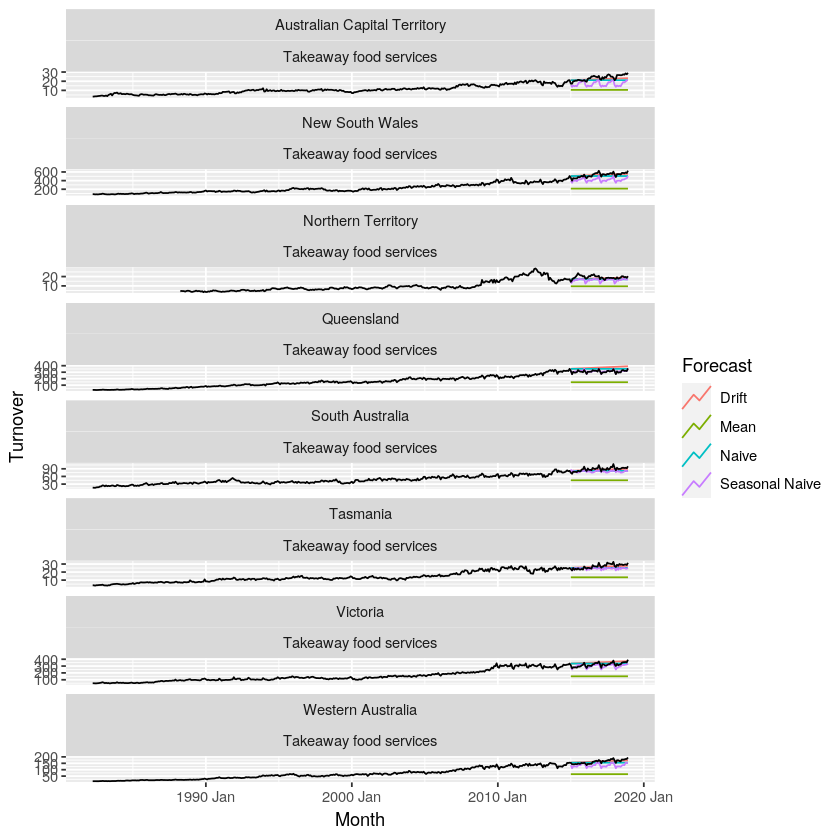

In [66]:
#fit various benchmark methods on training set
takeaway_fit <- takeaway_tr %>%
    model(
        Mean = MEAN(Turnover),
        Naive = NAIVE(Turnover),
        `Seasonal Naive` = SNAIVE(Turnover),
        Drift = RW(Turnover ~ drift())
    )

#create forecasts for test data
takeaway_fc <- takeaway_fit %>%
    forecast(takeaway_te)

#plot the forecasts
takeaway_fc %>%
    autoplot(takeaway, level = NULL) +
    guides(colour = guide_legend(title = "Forecast"))

## c.

In [67]:
accuracy(takeaway_fc, takeaway) %>%
    select(.model, State, RMSE, MAE, MAPE, MASE)

.model         State                        RMSE       MAE        MAPE     
1  Drift          Australian Capital Territory   2.840570   2.382791  9.723583
2  Drift          New South Wales               40.462529  32.337798  6.342305
3  Drift          Northern Territory             2.255330   1.707292  8.488836
4  Drift          Queensland                    64.068407  61.070833 20.045844
5  Drift          South Australia                6.677242   5.110491  5.653962
6  Drift          Tasmania                       2.238398   1.845610  6.710671
7  Drift          Victoria                      40.960593  36.042389 11.824729
8  Drift          Western Australia             11.208832   9.476488  5.961396
9  Mean           Australian Capital Territory  13.479820  13.157204 54.794312
10 Mean           New South Wales              319.424847 315.389424 59.227243
11 Mean           Northern Territory             9.873256   9.720093 49.903043
12 Mean           Queensland                   165.854125 164.774459 52.852002
13 Mean           South Australia               44.265898  43.636912 48.891586
14 Mean           Tasmania                      13.928653  13.655184 49.831735
15 Mean           Victoria                     172.665866 170.229835 52.678726
16 Mean           Western Australia             98.264145  97.091285 59.430636
17 Naive          Australian Capital Territory   3.916977   3.227083 12.899104
18 Naive          New South Wales               55.564330  47.881250  8.935579
19 Naive          Northern Territory             2.813287   2.404167 11.984762
20 Naive          Queensland                    44.935834  41.070833 13.629279
21 Naive          South Australia               10.002010   8.414583  9.173756
22 Naive          Tasmania                       3.351554   2.762500  9.730333
23 Naive          Victoria                      32.926515  27.587500  9.000670
24 Naive          Western Australia             17.032163  14.491667  8.625465
25 Seasonal Naive Australian Capital Territory   7.290733   6.618750 27.270086
26 Seasonal Naive New South Wales              118.071884 111.818750 20.843640
27 Seasonal Naive Northern Territory             3.473411   3.175000 16.195015
28 Seasonal Naive Queensland                     8.873228   7.020833  2.281456
29 Seasonal Naive South Australia               11.431581   9.847917 10.784907
30 Seasonal Naive Tasmania                       3.720607   3.087500 10.793906
31 Seasonal Naive Victoria                      28.463193  24.758333  7.591527
32 Seasonal Naive Western Australia             31.315451  28.433333 17.196764
   MASE      
1   1.8854485
2   1.5331310
3   1.0188357
4   4.6485770
5   1.1697790
6   1.2554498
7   2.7058424
8   1.4874112
9  10.4109965
10 14.9525740
11  5.8005193
12 12.5422681
13  9.9883829
14  9.2887436
15 12.7798162
16 15.2392599
17  2.5535177
18  2.2700442
19  1.4346997
20  3.1262212
21  1.9260777
22  1.8791510
23  2.0711010
24  2.2745839
25  5.2372664
26  5.3013133
27  1.8946987
28  0.5344103
29  2.2541642
30  2.1002276
31  1.8587044
32  4.4628409

Error metrics by region:

- **ACT**: Drift < Naive < SNAIVE < Mean
- **NSW**: Drift < Naive < SNAIVE < Mean
- **NT**: Drift < Naive < SNAIVE < Mean
- **Q**: SNAIVE < Naive < Drift < Mean
- **SA**: Drift < Naive < SNAIVE < Mean
- **T**: Drift < Naive < SNAIVE < Mean
- **V**: SNAIVE < Naive < Drift < Mean
- **WA**: Drift < Naive < SNAIVE < Mean

It's hard to answer which method did the best since for 6 of the 8 States `DRIFT` produces the most accurate forecasts, where `SNAIVE` produces the most accurate forecasts for the other two States.

If i'm forced to choose just one method, however, I would choose `NAIVE` since it is the consistent second best method for each State.

## d.

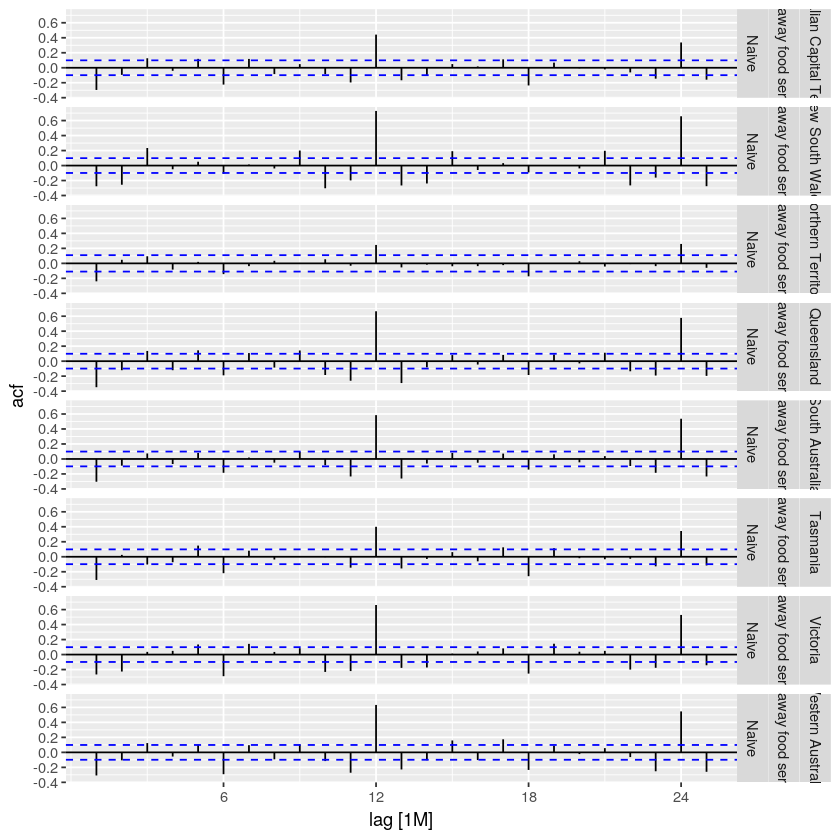

In [68]:
takeaway_fit %>%
    select(-Mean, -Drift, -`Seasonal Naive`) %>% #select the Drift method
    augment() %>%
    ACF(.resid) %>%
    autoplot()

No, the residuals from the `NAIVE` method do not resemble white noise.

# 11.

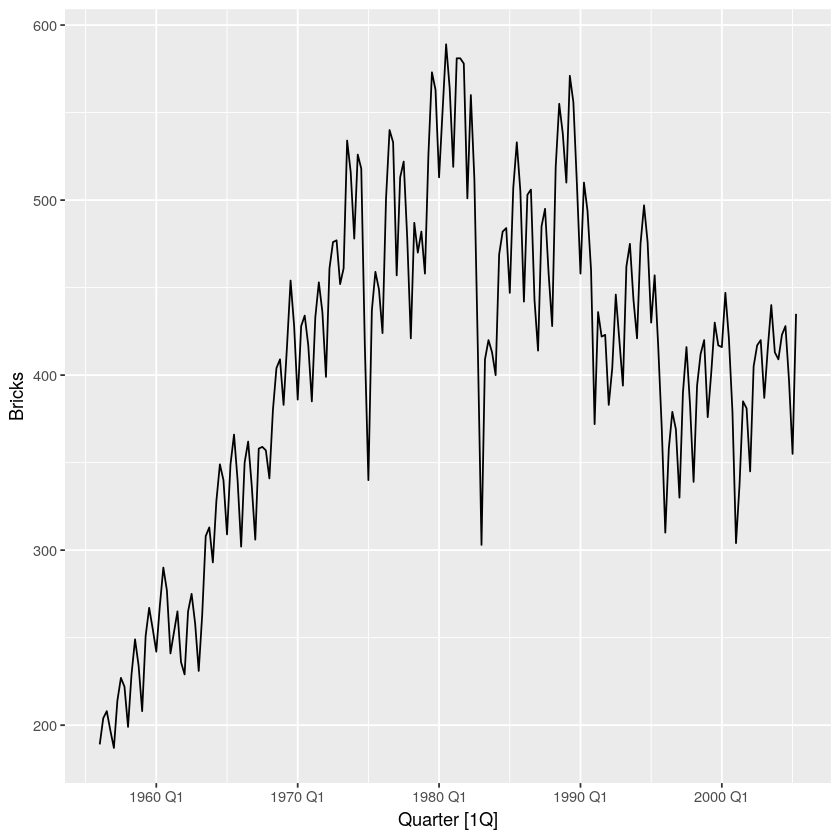

In [69]:
bricks %>%
    autoplot(Bricks)

Warning message in NextMethod("["):
“Incompatible methods (">=.Date", ">=.vctrs_vctr") for ">="”Warning message in NextMethod("["):
“Incompatible methods ("<=.Date", "<=.vctrs_vctr") for "<="”Warning message in NextMethod("["):
“Incompatible methods (">=.Date", ">=.vctrs_vctr") for ">="”Warning message in NextMethod("["):
“Incompatible methods ("<=.Date", "<=.vctrs_vctr") for "<="”

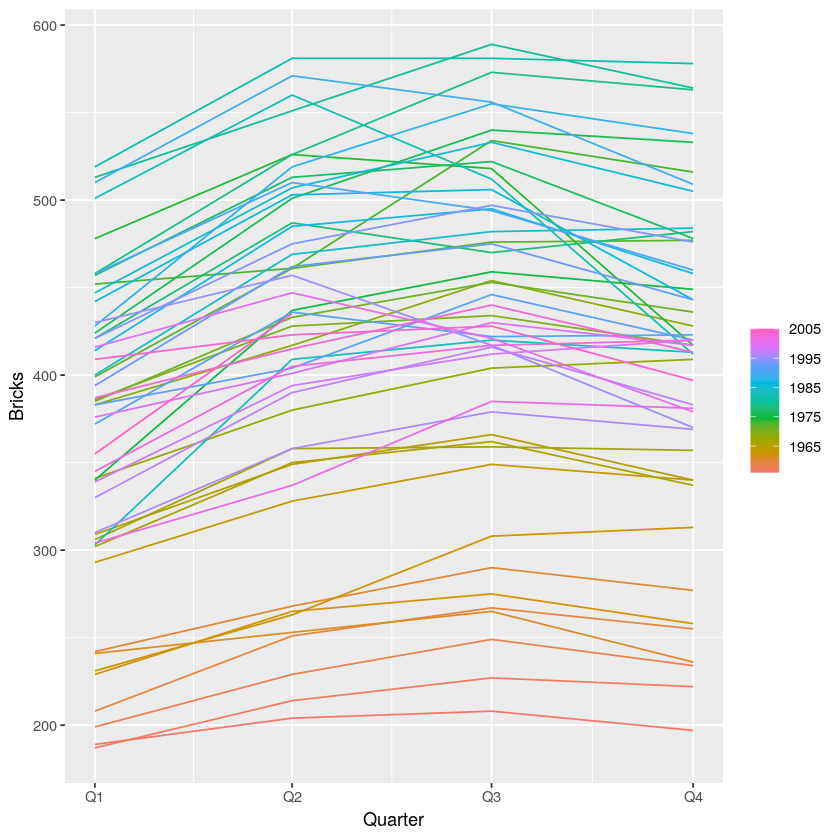

In [70]:
bricks %>%
    gg_season(Bricks)

## a.

After doing a bit of experimentation (not shown), I decided to go with a fixed-seasonality model, mostly for simplicity's sake.

In [71]:
dcmp <- bricks %>%
    model(STL(Bricks ~ trend(window = NULL) +  #default window size
            season(window = "periodic"))) %>%
    components()

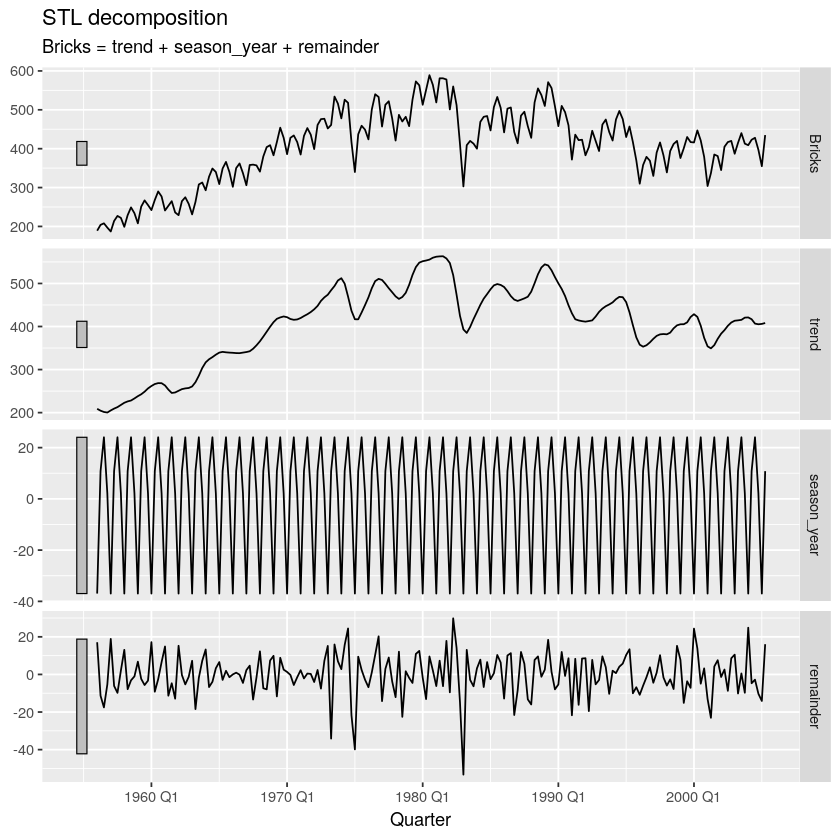

In [72]:
dcmp %>%
    autoplot()

## b.

In [73]:
dcmp <- dcmp %>%
    select(-.model)

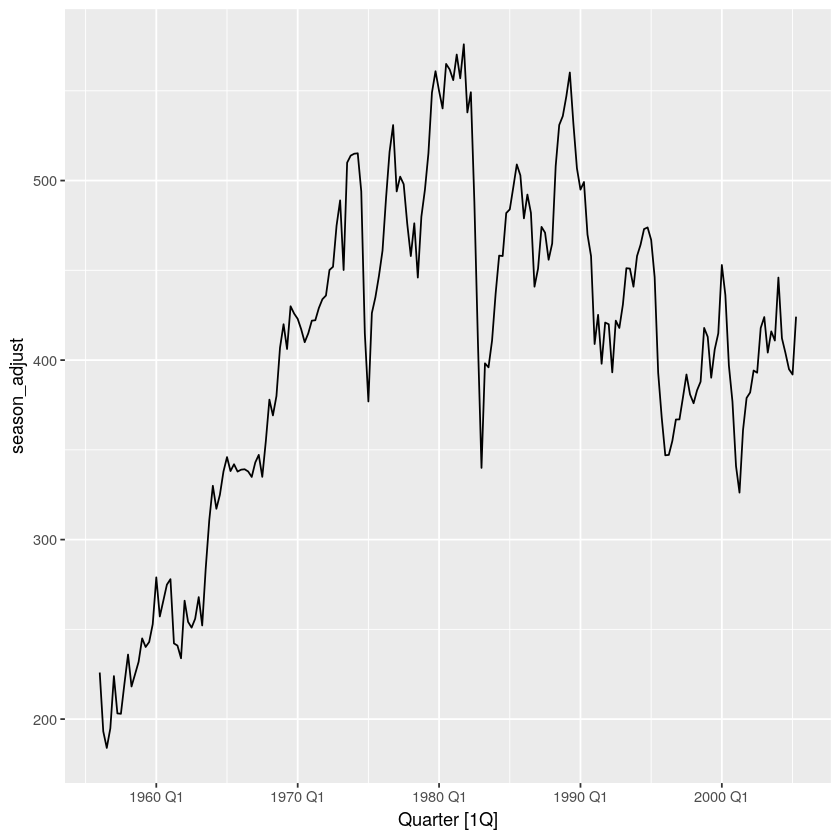

In [74]:
dcmp %>%
    autoplot(season_adjust)

## c.

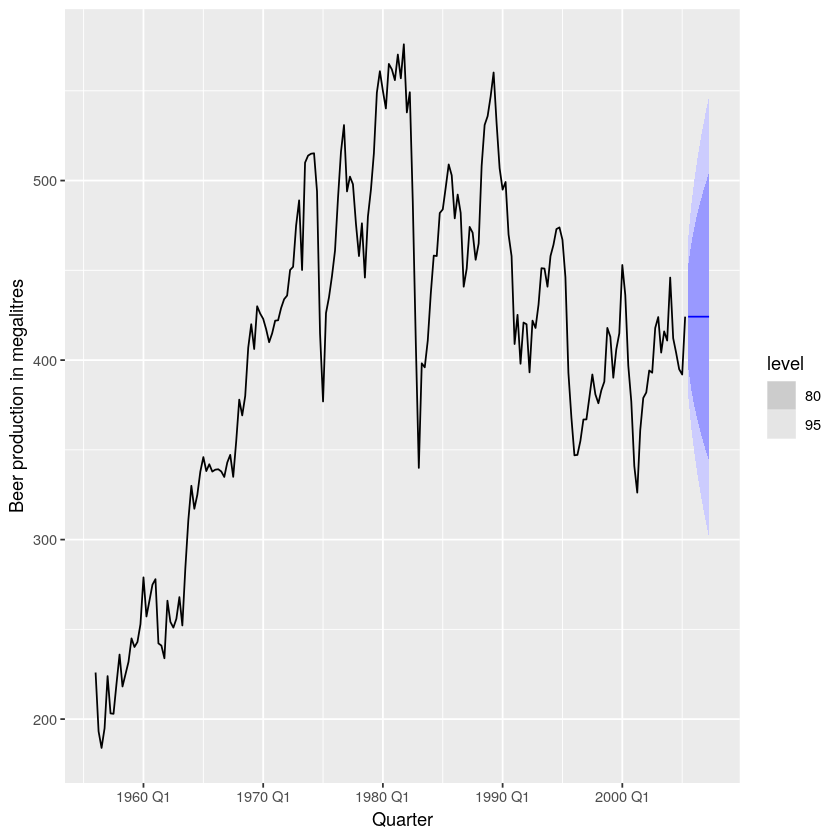

In [75]:
dcmp %>%
    model(NAIVE(season_adjust)) %>%
    forecast() %>%
    autoplot(dcmp) +
    labs(y = "Beer production in megalitres")

## d.

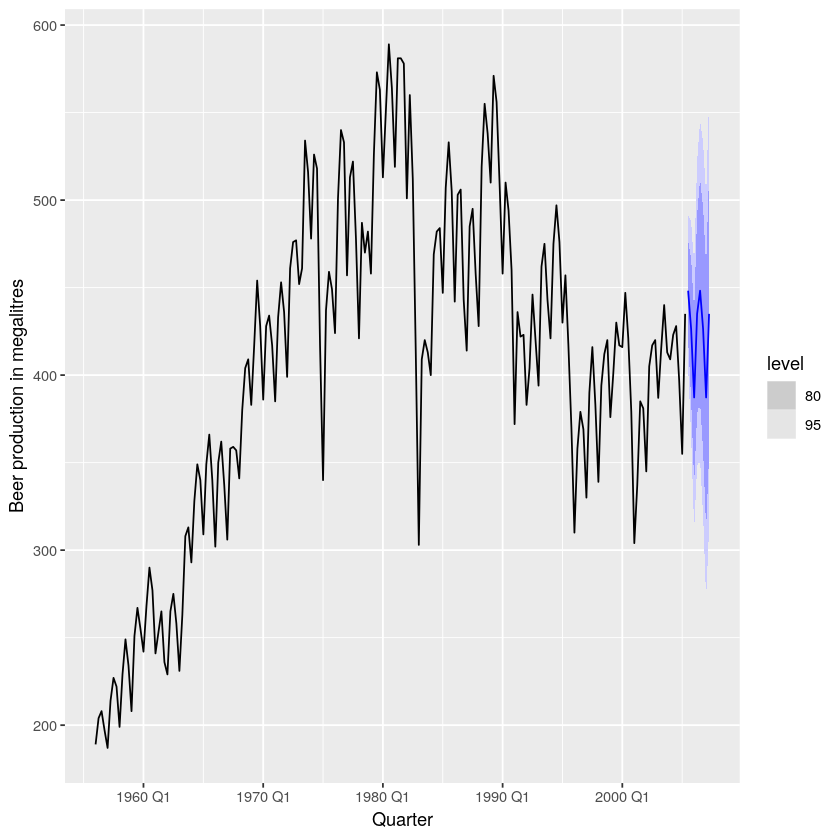

In [76]:
fit_dcmp <- bricks %>%
    model(stlf = decomposition_model(
            STL(Bricks ~ trend(window = NULL) +  #default window size
                season(window = "periodic")),
            NAIVE(season_adjust)
    ))

fit_dcmp %>%
    forecast() %>%
    autoplot(bricks) +
    labs(y = "Beer production in megalitres")

## e.

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

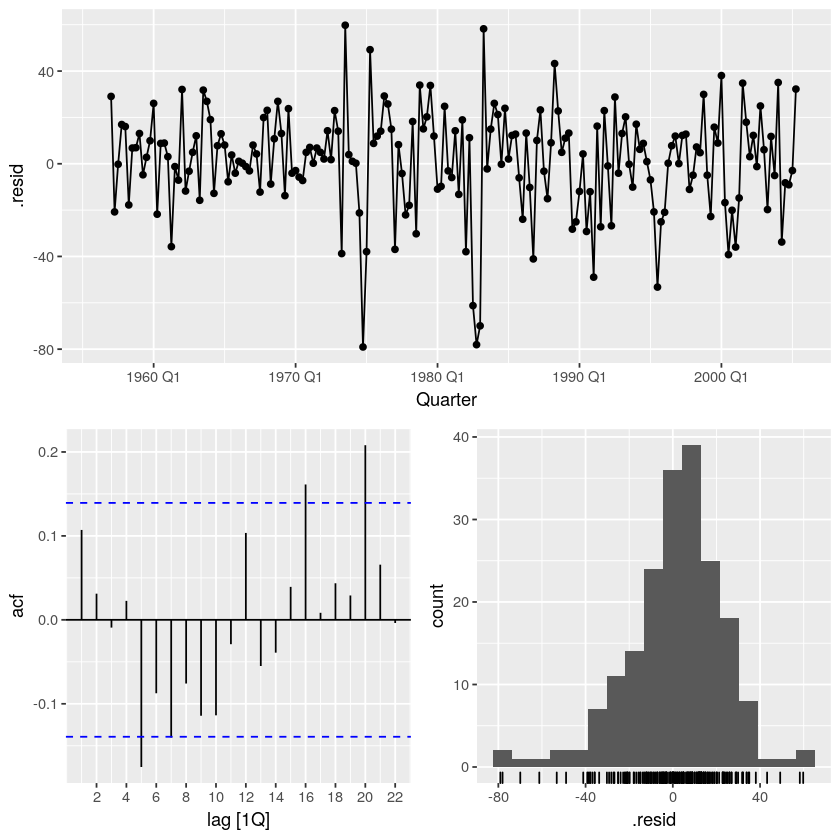

In [77]:
fit_dcmp %>% gg_tsresiduals()

No, the residuals do not look uncorrelated.

## f.

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”Warning message:
“Removed 4 rows containing missing values (geom_point).”Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”

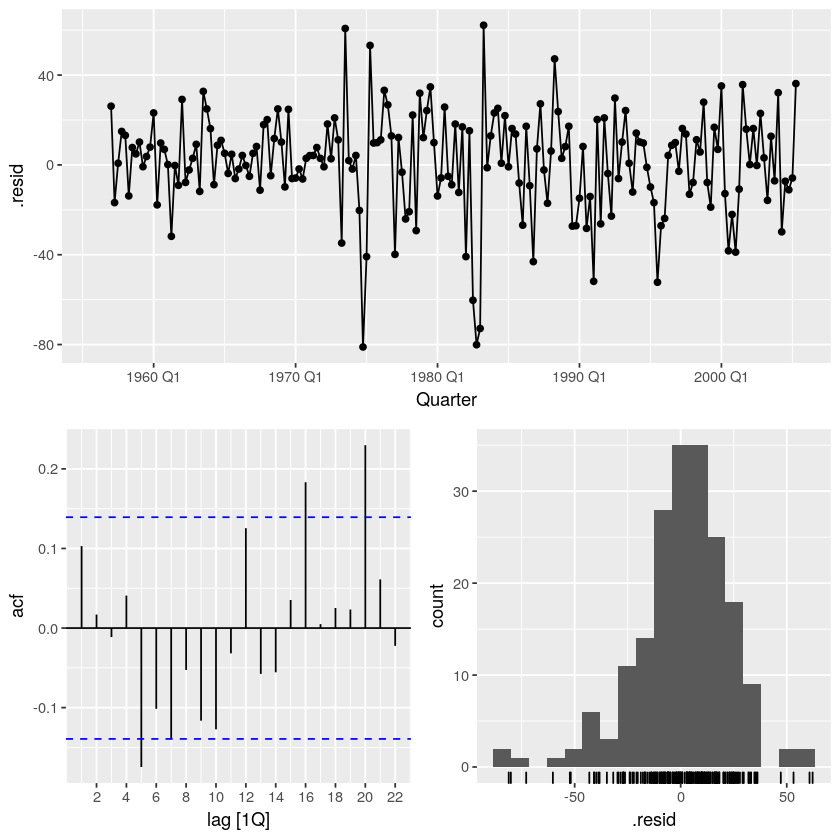

In [78]:
fit_dcmp <- bricks %>%
    model(stlf = decomposition_model(
            STL(Bricks ~ trend(window = NULL) +  #default window size
                season(window = "periodic"), robust = TRUE),
            NAIVE(season_adjust)
    ))

fit_dcmp %>% gg_tsresiduals()

No, it does not make much of a difference.

## g.

Create the training and test sets.

In [79]:
#training set
bricks_tr <- bricks %>%
    filter_index("1956 Q1" ~ "2003 Q2")

#test set
bricks_te <- bricks %>%
    filter_index("2003 Q3" ~ "2005 Q2")

Fit and compare the models.

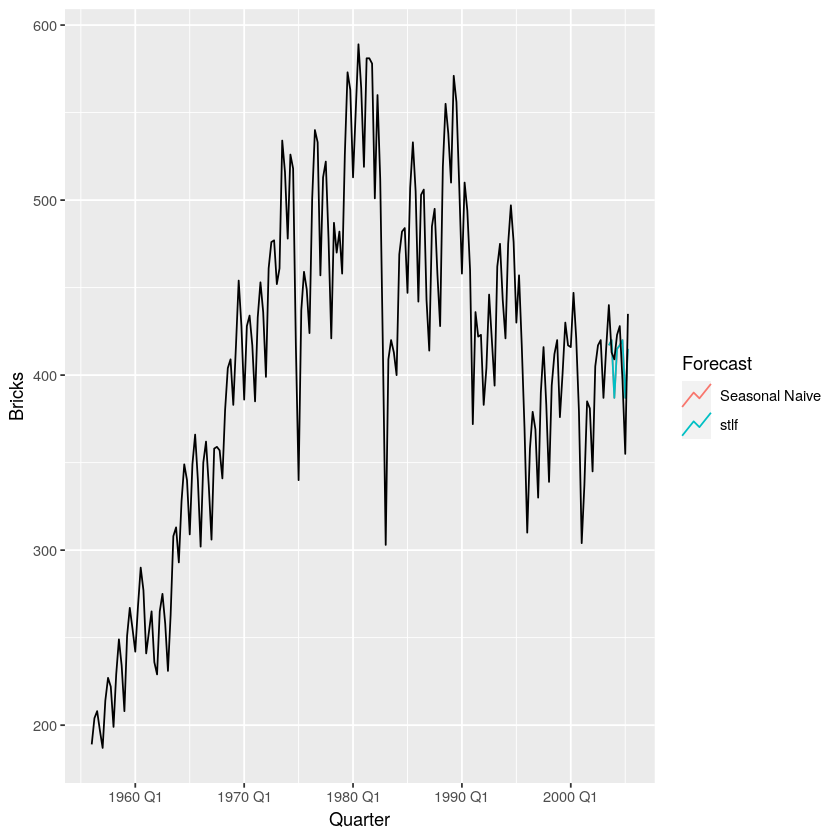

In [80]:
#fit various benchmark methods on training set
bricks_fit <- bricks_tr %>%
    model(stlf = decomposition_model(
            STL(Bricks ~ trend(window = NULL) +  #default window size
                season(window = "periodic"), robust = TRUE),
            SNAIVE(season_adjust)),
          `Seasonal Naive` = SNAIVE(Bricks))

#create forecasts for test data
bricks_fc <- bricks_fit %>%
    forecast(bricks_te)

#plot the forecasts
bricks_fc %>%
    autoplot(bricks, level = NULL) +
    guides(colour = guide_legend(title = "Forecast"))

In [81]:
accuracy(bricks_fc, bricks) %>%
    select(.model, RMSE, MAE, MAPE, MASE)

.model         RMSE MAE   MAPE     MASE     
1 Seasonal Naive 20   18.25 4.520968 0.5044583
2 stlf           20   18.25 4.520968 0.5044583

They both produced equal forecasts!

# 12.

In [82]:
print(tourism)

# A tsibble: 24,320 x 5 [1Q]
# Key:       Region, State, Purpose [304]
   Quarter Region   State           Purpose  Trips
     <qtr> <chr>    <chr>           <chr>    <dbl>
 1 1998 Q1 Adelaide South Australia Business  135.
 2 1998 Q2 Adelaide South Australia Business  110.
 3 1998 Q3 Adelaide South Australia Business  166.
 4 1998 Q4 Adelaide South Australia Business  127.
 5 1999 Q1 Adelaide South Australia Business  137.
 6 1999 Q2 Adelaide South Australia Business  200.
 7 1999 Q3 Adelaide South Australia Business  169.
 8 1999 Q4 Adelaide South Australia Business  134.
 9 2000 Q1 Adelaide South Australia Business  154.
10 2000 Q2 Adelaide South Australia Business  169.
# … with 24,310 more rows


## a.

In [83]:
gc_tourism <- tourism %>%
    filter(Region == "Gold Coast") %>%
    summarise(Trips = sum(Trips))

In [84]:
print(gc_tourism)

# A tsibble: 80 x 2 [1Q]
   Quarter Trips
     <qtr> <dbl>
 1 1998 Q1  827.
 2 1998 Q2  681.
 3 1998 Q3  839.
 4 1998 Q4  820.
 5 1999 Q1  987.
 6 1999 Q2  751.
 7 1999 Q3  822.
 8 1999 Q4  914.
 9 2000 Q1  871.
10 2000 Q2  780.
# … with 70 more rows


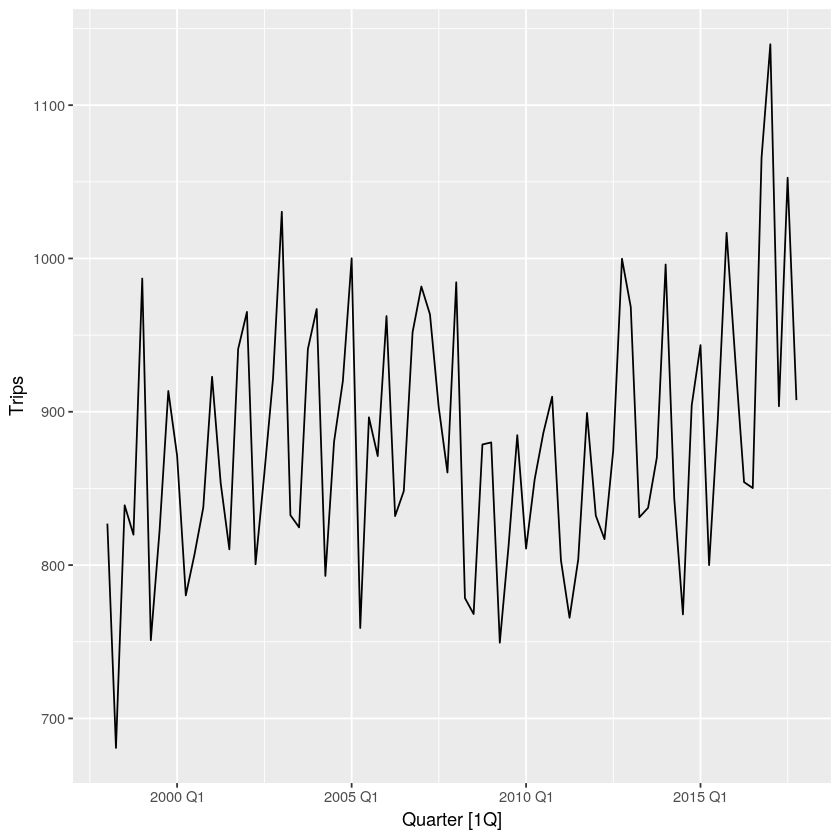

In [85]:
gc_tourism %>%
    autoplot(Trips)

## b.

In [86]:
#excludes last year
gc_train_1 <- gc_tourism %>% slice(1:(n()-4))#b/c 4 quarters in a year

#excludes last two years
gc_train_2 <- gc_tourism %>% slice(1:(n()-8))

#excludes last three years
gc_train_3 <- gc_tourism %>% slice(1:(n()-12))

## c.

In [87]:
gc_fc_1 <- gc_train_1 %>% 
    model(`Seasonal Naive` = SNAIVE(Trips)) %>%
    forecast(h=4)#b/c 4 quarters in a year

gc_fc_2 <- gc_train_2 %>% 
    model(`Seasonal Naive` = SNAIVE(Trips)) %>%
    forecast(h=4)

gc_fc_3 <- gc_train_3 %>% 
    model(`Seasonal Naive` = SNAIVE(Trips)) %>%
    forecast(h=4)

## d.

In [88]:
print("gc_fc_1:")
accuracy(gc_fc_1, gc_tourism) %>%
    select(MAPE)

print("gc_fc_2:")
accuracy(gc_fc_2, gc_tourism) %>%
    select(MAPE)

print("gc_fc_3:")
accuracy(gc_fc_3, gc_tourism) %>%
    select(MAPE)

[1] "gc_fc_1:"


MAPE    
1 15.06055

[1] "gc_fc_2:"


MAPE    
1 4.320729

[1] "gc_fc_3:"


MAPE    
1 9.067368

What we can take away from these MAPE scores is that the `SNAIVE` approach is not able to adjust quickly enough to the changes in the data. If the last 3 years of the data had instead been more seasonally stable with less trend, the three forecast scores above would have been much more similar. But because the data did change a lot over the last three years, the `SNAIVE` model was not able to adjust enough to produce accurate forecasts.